Colab is an online place (cloud) for running Python notebooks--we will use it to run our vis :) 

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub; a sidenote: File-Download it and convert to pdf: https://2pdf.com/convert-ipynb-to-pdf

And after adjusting to run with your own data, you can submit it as ps :)

And let's meet one-on-one and make sure we got this working for your own data

In [ ]:
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np
from statistics import *

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work                                                  

from google.colab import files

import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

#! pip install geocoder #]later maybe
! pip install geopandas #this is how you install packages on colab
import geopandas as gpd                                                                                       
#from geopy.geocoders import Nominatim #later maybe

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#!pip install mpld3 #LATER to zoom graphs and pop up info on hover
#import mpld3

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.6 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


# DAT MAN: pandas, like stata, your lib for all data mgmt, most stats, (and much vis) 


note:  pandas is kind of like stata, or more like r, but not really like
the rest of Py, and helps a lot with traditional data

REFS:

https://towardsdatascience.com/going-from-stata-to-pandas-706888525acf

http://statapython.blogspot.com/

http://www.dataschool.io/best-python-pandas-resources/

https://www.dataquest.io/blog/pandas-python-tutorial/

many great tutorials for self study:
https://pandas.pydata.org/pandas-docs/stable/tutorials.html

tutorials in notebooks (just click on folder and may just go straight to one with solutions
and run them in Python):

https://github.com/guipsamora/pandas_exercises/tree/master/01_Getting_%26_Knowing_Your_Data 
 
https://github.com/guipsamora/pandas_exercises/tree/master/06_Stats  

https://github.com/guipsamora/pandas_exercises/tree/master/07_Visualization

for afficionados: https://jakevdp.github.io/PythonDataScienceHandbook/
eg it shows how pandas builds on numpy and whats under the hood


### [jan18] loading real data,  csv file, and basics                                                                           
any software incl excel and spss can save as csv,    just make sure it is clean: one short alphanumeric header per column                                                                                                                                                                  
let's do an example, your first ps will be sth like that but using your own data                                                             



In [ ]:
#download file from online and save in colab as ex1.csv; note it's from: https://conjointly.com/kb/correlation-statistic/
#urllib.request.urlretrieve("https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download", "ex1.csv")
!wget -q -O ex1.csv https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download

In [ ]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST                                                                          
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
auto.dta	      nj_munis.dbf	 nj_state.sbn
nj_counties.cpg       nj_munis_fgdc.xml  nj_state.sbx
nj_counties.dbf       nj_munis.prj	 nj_state.shp
nj_counties_fgdc.xml  nj_munis.sbn	 nj_state.shp.xml
nj_counties.prj       nj_munis.sbx	 nj_state.shx
nj_counties.sbn       nj_munis.shp	 sample_data
nj_counties.sbx       nj_munis.shp.xml	 state-abbrevs.csv
nj_counties.shp       nj_munis.shx	 state-areas.csv
nj_counties.shp.xml   nj_state.cpg	 state-population.csv
nj_counties.shx       nj_state.dbf	 zillow.csv
nj-counties.zip       nj_state_fgdc.xml
nj_munis.cpg	      nj_state.prj


In [ ]:
dat=pd.read_csv('ex1.csv') #read it in  ; or full path: '/content/ex1.csv'

In [ ]:
dat.columns #list var names

Index(['Person', 'Height', 'Self Esteem'], dtype='object')

In [ ]:
dat.head(2)
dat.tail(2)

,Person,Height,Self Esteem
0,1,68,4.1
1,2,71,4.6


,Person,Height,Self Esteem
18,19,63,3.4
19,20,61,3.6


In [ ]:
dat #get spreadsheet view: can sort on cols, filter, and copy

,Person,Height,Self Esteem
0,1,68,4.1
1,2,71,4.6
2,3,62,3.8
3,4,75,4.4
4,5,58,3.2
5,6,60,3.1
6,7,67,3.8
7,8,68,4.1
8,9,71,4.3
9,10,69,3.7


In [ ]:
dat["Height"][0:3] #subset or slice

0    68
1    71
2    62
Name: Height, dtype: int64

In [ ]:
#keep it simple! especially when figuring things out! keep only vars needed, say 5 or 10
#dont have a dataset with 500vars--you won't use them! just clutter and mess!
#and then later whenever you need more vars, just rerun the code retaining more
dat[["Height","Self Esteem"]][0:3]

,Height,Self Esteem
0,68,4.1
1,71,4.6
2,62,3.8


In [ ]:
# if data big take random sample! way better to learn and figure things out with small sample!!
# say frac=.1 for 10perc, or n=10 for 10obs
dat.sample(frac=0.5, replace=False, random_state=1) #random_state to ensure reproducibility of results; 

,Person,Height,Self Esteem
3,4,75,4.4
16,17,65,4.1
6,7,67,3.8
10,11,68,3.5
2,3,62,3.8
14,15,60,3.4
4,5,58,3.2
17,18,67,3.8
7,8,68,4.1
1,2,71,4.6


In [ ]:
#dat["Height"]

In [ ]:
dat["Height"].mean() # median, mode, stdev

65.4

In [ ]:
dat["Height"].value_counts() # a tab or freq table

68    3
67    3
63    3
71    2
62    2
60    2
75    1
58    1
69    1
65    1
61    1
Name: Height, dtype: int64

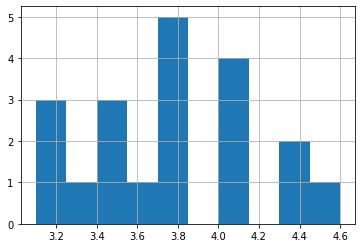

In [ ]:
dat["Self Esteem"].hist() #again, always interpret all output

In [ ]:
pd.crosstab(dat["Height"], dat["Self Esteem"]) #too many numbers for a crosstab!

Self Esteem,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,4.0,4.1,4.3,4.4,4.6
Height,,,,,,,,,,,,,
58,0,1,0,0,0,0,0,0,0,0,0,0,0
60,1,0,0,1,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,1,0,0,0,0,0,0,0
62,0,0,1,0,0,0,0,1,0,0,0,0,0
63,0,0,0,1,0,0,1,0,1,0,0,0,0
65,0,0,0,0,0,0,0,0,0,1,0,0,0
67,0,1,0,0,0,0,0,2,0,0,0,0,0
68,0,0,0,0,1,0,0,0,0,2,0,0,0
69,0,0,0,0,0,0,1,0,0,0,0,0,0


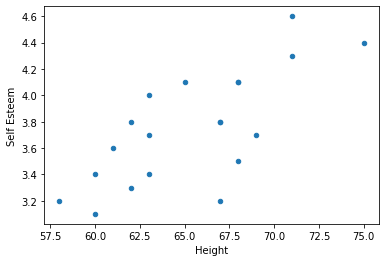

In [ ]:
dat.plot(kind='scatter', y='Self Esteem', x='Height')

In [ ]:
dat[['Height','Self Esteem']].corr().round(2)

,Height,Self Esteem
Height,1.00,0.73
Self Esteem,0.73,1.00


### [jan25] import/export and des sta 
can import-export many formats incl xls, stata, sas:
https://pandas.pydata.org/docs/user_guide/io.html

if you work a lot with xls check out:

https://realpython.com/openpyxl-excel-spreadsheets-python/ 

https://automatetheboringstuff.com/chapter12/


In [ ]:
urllib.request.urlretrieve("https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download", "auto.dta")
auto=pd.read_stata('auto.dta') #load stata data
auto.head(2)
#auto.to_stata('stata.dta') #save as stata data

#useful to set index to sth meaningful as opposed to 0,1,2
#auto = auto.set_index('make')

('auto.dta', <http.client.HTTPMessage at 0x7fc01ba75640>)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


In [ ]:
auto.to_excel('auto.xlsx', sheet_name = 'testing', index = False) #save as xls
excelTest1 = pd.read_excel('auto.xlsx', 0)
excelTest1.head(2)
excelTest1.tail(2)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign
73,Volvo 260,11995,17,5.0,2.5,14,3170,193,37,163,2.98,Foreign


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff27d048640>,
      dtype=object)

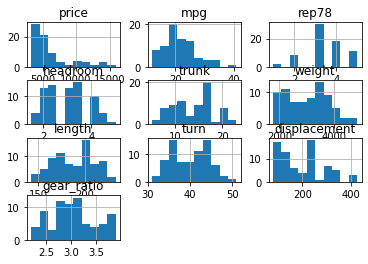

In [ ]:
#dir(auto) # all the stuff you can do on auto :)
#dir(auto.price) #and stuff you can do on price var
auto.hist() # eg hist

In [ ]:
#auto['make'][0] #py counts from zero!
auto['make'][0:3]
#auto[['weight', 'length']][0:3]   #note that need to double [[ ]]
# can also use loc or iloc to subset/slice on both rows and cols

0    AMC Concord
1      AMC Pacer
2     AMC Spirit
Name: make, dtype: object

In [ ]:
max(auto['mpg'])
print() #just add space
min(auto['mpg'])
#auto['mpg'].max()
#auto['mpg'].min()
#auto['mpg'].median()
#auto['mpg'].mean()
#auto['mpg'].std()

41

12

In [ ]:
#subsetting on condition
auto.make[auto.mpg<15] 
#auto['make'][auto['mpg']<15] 

10         Cad. Deville
11        Cad. Eldorado
25    Linc. Continental
26         Linc. Mark V
27     Linc. Versailles
29         Merc. Cougar
32           Merc. XR-7
63          Peugeot 604
Name: make, dtype: object

In [ ]:
#subsetting using query
#auto.query("mpg<15  & foreign=='Foreign'")
#auto.query("weight <2000 | length <150")
auto.query("weight + length <2000")

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
23,Ford Fiesta,4389,28,4.0,1.5,9,1800,147,33,98,3.15,Domestic
42,Plym. Champ,4425,34,5.0,2.5,11,1800,157,37,86,2.97,Domestic
61,Honda Civic,4499,28,4.0,2.5,5,1760,149,34,91,3.30,Foreign
64,Renault Le Car,3895,26,3.0,3.0,10,1830,142,34,79,3.72,Foreign


In [ ]:
#len(auto) #stata: count
auto.shape #74 obs, 12 vars

(74, 12)

In [ ]:
auto.dtypes #stata: des ; BUT note no str but object and category

make              object
price              int16
mpg                int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
auto.make[0:5] #note dtype

0      AMC Concord
1        AMC Pacer
2       AMC Spirit
3    Buick Century
4    Buick Electra
Name: make, dtype: object

In [ ]:
auto.foreign[0:5] #note dtype and categories

0    Domestic
1    Domestic
2    Domestic
3    Domestic
4    Domestic
Name: foreign, dtype: category
Categories (2, object): ['Domestic' < 'Foreign']

In [ ]:
#auto.describe() #stata: sum
auto.describe().T.round(2) #T just transposes

,count,mean,std,min,25%,50%,75%,max
price,74.0,6165.26,2949.50,3291.00,4220.25,5006.50,6332.25,15906.00
mpg,74.0,21.30,5.79,12.00,18.00,20.00,24.75,41.00
rep78,69.0,3.41,0.99,1.00,3.00,3.00,4.00,5.00
headroom,74.0,2.99,0.85,1.50,2.50,3.00,3.50,5.00
trunk,74.0,13.76,4.28,5.00,10.25,14.00,16.75,23.00
weight,74.0,3019.46,777.19,1760.00,2250.00,3190.00,3600.00,4840.00
length,74.0,187.93,22.27,142.00,170.00,192.50,203.75,233.00
turn,74.0,39.65,4.40,31.00,36.00,40.00,43.00,51.00
displacement,74.0,197.30,91.84,79.00,119.00,196.00,245.25,425.00
gear_ratio,74.0,3.01,0.46,2.19,2.73,2.96,3.35,3.89


In [ ]:
auto[['price','mpg','foreign']].groupby('foreign').describe().round(2)
#auto[['price','mpg','foreign']].groupby('foreign').median()

price                                                             \
         count     mean      std     min     25%     50%     75%      max   
foreign                                                                     
Domestic  52.0  6072.42  3097.10  3291.0  4185.5  4782.5  6199.5  15906.0   
Foreign   22.0  6384.68  2621.92  3748.0  4521.5  5759.0  7067.5  12990.0   

           mpg                                              
         count   mean   std   min    25%   50%   75%   max  
foreign                                                     
Domestic  52.0  19.83  4.74  12.0  16.75  19.0  22.0  34.0  
Foreign   22.0  24.77  6.61  14.0  21.00  24.5  27.5  41.0

,price,mpg
foreign,,
Domestic,4782.5,19.0
Foreign,5759.0,24.5


In [ ]:
#auto[['make', 'price', 'mpg', 'rep78', 'foreign']].head(3) #first 3 obs; stata: l make price mpg rep78 foreign in 1/3
auto.sort_values(by='mpg')[['mpg','make','price']][0:3] #3 cars with lowest mpg

,mpg,make,price
26,12,Linc. Mark V,13594
25,12,Linc. Continental,11497
29,14,Merc. Cougar,5379


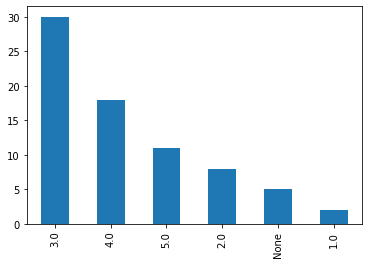

In [ ]:
#auto['rep78'].value_counts() #stata: ta rep78
auto['rep78'].value_counts().plot(kind='bar') #stata can do plot too of tab in ascii
#auto.groupby('rep78').count() #just show counts of rep78 by other vars

In [ ]:
# stata: ta rep78 foreign
pd.crosstab(auto.rep78, auto.foreign) # crosstab
#pd.crosstab(auto.rep78, auto.foreign,normalize='columns') # col prop (normalize columns)
#pd.crosstab(auto.rep78, auto.foreign,normalize='index') #row prop (normalize rows)
#pd.crosstab(auto.rep78, auto.foreign,normalize='all') #cell prop

foreign,Domestic,Foreign
rep78,,
1.0,2,0
2.0,8,0
3.0,27,3
4.0,9,9
5.0,2,9


In [ ]:
#stata: bys foreign: sum mpg
auto.groupby(by=auto.foreign)['mpg'].mean().round(2) #mpg mean by foreign

foreign
Domestic    19.83
Foreign     24.77
Name: mpg, dtype: float64

In [ ]:
pd.pivot_table(auto, index='foreign', values='mpg', aggfunc='mean').round(2)

,mpg
foreign,
Domestic,19.826923
Foreign,24.772727


In [ ]:
pd.pivot_table(auto, index=['rep78','foreign'], values= 'mpg' , aggfunc=['median','std','min','max']).round(1)

median  std min max
                  mpg  mpg mpg mpg
rep78 foreign                     
1.0   Domestic     21  4.2  18  24
2.0   Domestic     18  3.8  14  24
3.0   Domestic     19  4.1  12  29
      Foreign      23  2.5  21  26
4.0   Domestic     18  4.6  14  28
      Foreign      25  2.7  21  30
5.0   Domestic     32  2.8  30  34
      Foreign      25  9.4  17  41

In [ ]:
#stata: corr mpg wei
#auto.mpg.corr(auto.weight) 
auto[['mpg','weight']].corr().round(2) #corr matrix

,mpg,weight
mpg,1.00,-0.81
weight,-0.81,1.00


### manipulating data
btw, often running cell by cell is pain--can just collapse the whole section and then run the whole section at once :)

also may see per dropping, renaming, duplicate rows, outliers:
https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb

In [ ]:
auto.info() #useful function to see which var has missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   make          74 non-null     object  
 1   price         74 non-null     int16   
 2   mpg           74 non-null     int16   
 3   rep78         69 non-null     float64 
 4   headroom      74 non-null     float32 
 5   trunk         74 non-null     int16   
 6   weight        74 non-null     int16   
 7   length        74 non-null     int16   
 8   turn          74 non-null     int16   
 9   displacement  74 non-null     int16   
 10  gear_ratio    74 non-null     float32 
 11  foreign       74 non-null     category
dtypes: category(1), float32(2), float64(1), int16(7), object(1)
memory usage: 3.5+ KB


In [ ]:
auto['rep78'][0:3]
#print()
#auto['rep78'][0:3].notnull()
#auto['rep78'][0:3].isnull()

0    3.0
1    3.0
2    NaN
Name: rep78, dtype: float64

In [ ]:
# missing data
#http://pandas.pydata.org/pandas-docs/stable/missing_data.html
#https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

auto['rep78'].value_counts() #doesn't show missing
#print(auto['rep78'].to_string()) #print all rows
print()
print("count of missing:")
auto['rep78'].isnull().sum() #count missings on rep78 #NaN stands for missing
print()
#auto.loc[auto['rep78'].isnull()]
#auto[auto.rep78.isnull()][['rep78']] 
auto[auto.rep78.isnull()][['make', 'price', 'mpg', 'rep78', 'foreign']] #stata: l make price mpg rep78 foreign if rep78==.

3.0    30
4.0    18
5.0    11
2.0     8
1.0     2
Name: rep78, dtype: int64


count of missing:


5

,make,price,mpg,rep78,foreign
2,AMC Spirit,3799,22,NaN,Domestic
6,Buick Opel,4453,26,NaN,Domestic
44,Plym. Sapporo,6486,26,NaN,Domestic
50,Pont. Phoenix,4424,19,NaN,Domestic
63,Peugeot 604,12990,14,NaN,Foreign


In [ ]:
auto2=auto.replace(np.nan, "None") #replace missing (np.nan) with "None"
auto2[auto2["rep78"]=="None"] #list the missing ones
#but in Py best keep missing as np.nan, so in general do sth like:
#auto.replace(-99, np.nan,inplace=True) #replace all -99 with missing
#auto.fillna('-', inplace=True) #replace missing with '-'

#can also get rid of missing just keep finite stuff:
#auto3 = auto[np.isfinite(auto['rep78'])]
#auto3.reset_index(inplace=True) #sometimes things go wrong bc index is not reset!
#len(auto)
#print()
#len(auto3)
##or more concisely for all of dataframe:
#len(auto)
#len(auto.dropna())
#auto.dropna(axis=1).dtypes #drop cols with missing data

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
2,AMC Spirit,3799,22,None,3.0,12,2640,168,35,121,3.08,Domestic
6,Buick Opel,4453,26,None,3.0,10,2230,170,34,304,2.87,Domestic
44,Plym. Sapporo,6486,26,None,1.5,8,2520,182,38,119,3.54,Domestic
50,Pont. Phoenix,4424,19,None,3.5,13,3420,203,43,231,3.08,Domestic
63,Peugeot 604,12990,14,None,3.5,14,3420,192,38,163,3.58,Foreign


In [ ]:
# tostring, destring
auto['mpgST'] = auto.mpg.astype(object) #tostring
auto['mpgNU'] = auto.mpgST.astype(float) #destring
auto[['mpg','mpgST','mpgNU']][0:2]
auto[['mpg','mpgST','mpgNU']].dtypes #.fillna()

,mpg,mpgST,mpgNU
0,22,22,22.0
1,17,17,17.0


mpg        int16
mpgST     object
mpgNU    float64
dtype: object

In [ ]:
#stata: ren mpg newMpg
auto = auto.rename(columns={'mpg': 'newMpg',
                           'make': 'newMake'}) #ren var
auto.dtypes

newMake           object
price              int16
newMpg             int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
#stata: drop newMpg; but in general better just subset at the beginning
#del auto['newMpg']
auto.drop('newMpg',axis=1)

,newMake,price,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,4.0,4.0,20,4080,222,43,350,2.41,Domestic
...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,4.0,2.5,12,2160,172,36,97,3.74,Foreign
70,VW Diesel,5397,5.0,3.0,15,2040,155,35,90,3.78,Foreign
71,VW Rabbit,4697,4.0,3.0,15,1930,155,35,89,3.78,Foreign
72,VW Scirocco,6850,4.0,2.0,16,1990,156,36,97,3.78,Foreign


In [ ]:
auto.dtypes

newMake           object
price              int16
newMpg             int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
#new vars
auto['colOfOnes'] = 1
auto['colOfOnes'][0:3]

0    1
1    1
2    1
Name: colOfOnes, dtype: int64

In [ ]:
auto.at[1,'colOfOnes'] = 10 #https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe
auto['colOfOnes'][0:5]

0     1
1    10
2     1
3     1
4     1
Name: colOfOnes, dtype: int64

In [ ]:
auto['colOfOnes'].replace(1,2,inplace=True)
# can also replace more than one at once, eg
# data['sex'].replace([0,1],['Female','Male'],inplace=True)
# see https://stackoverflow.com/questions/31888871/pandas-replacing-column-values
auto['colOfOnes'][0:5]

0     2
1    10
2     2
3     2
4     2
Name: colOfOnes, dtype: int64

In [ ]:
# replace on condition
#auto.loc[auto['colOfOnes'] <5, 'colOfOnes']  = '22'
auto.loc[auto['foreign'] =='Domestic', 'colOfOnes']  = '100'
auto[['foreign','colOfOnes']][48:53]

,foreign,colOfOnes
48,Domestic,100
49,Domestic,100
50,Domestic,100
51,Domestic,100
52,Foreign,2


In [ ]:
#stata: by sort: egen mean count #stata: collapse
# https://stackoverflow.com/questions/50068443/collapse-rows-in-pandas-dataframe-with-different-logic-per-column
auto[['foreign','weight', 'length']].groupby('foreign').agg(['mean', 'count'])

weight            length      
                 mean count        mean count
foreign                                      
Domestic  3317.115385    52  196.134615    52
Foreign   2315.909091    22  168.545455    22

In [ ]:
#lets unpack a bit as this groupby agg may be non-intuitive
#https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
df = pd.DataFrame({'A': [1, 1, 2, 2],
                    'B': [1, 2, 3, 4],
                    'C': np.random.randn(4)})
df 
#and for a real world example using groupby agg see
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

,A,B,C
0,1,1,1.058948
1,1,2,-1.301589
2,2,3,-0.752999
3,2,4,0.993326


In [ ]:
df.groupby('A').agg('min')

,B,C
A,,
1,1,-1.301589
2,3,-0.752999


In [ ]:
df.groupby('A').agg(['min', 'max'])

B             C          
  min max       min       max
A                            
1   1   2 -1.301589  1.058948
2   3   4 -0.752999  0.993326

In [ ]:
df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

B             C
  min max       sum
A                  
1   1   2 -0.242641
2   3   4  0.240328

### labelling 

i'd just have nice descriptive var names, ditch var labels; and for val labels just have another string var that has labels instead of values; BUT see a workaround with dict below for printing var labels from stata


other ideas
https://stackoverflow.com/questions/60498830/view-stata-variable-labels-in-pandas ; 
https://stackoverflow.com/questions/22500108/value-label-in-pandas ; 
https://stackoverflow.com/questions/60805100/any-way-to-label-variables-in-python


LATER/TODO--see pandas docs

Value Labels: Python doesn't have value labels, but it has something even more useful, dicts.  
(I suspect that, under the covers, Stata is using hashes, which is what dicts really are, for value labels). The idea is to use a dict to map some or all of the values for a variable. 



In [ ]:
# var labels #on stata iterator in py: https://kylebarron.dev/blog/reading-stata-files-with-python
pd.read_stata('auto.dta', iterator=True).variable_labels() #return stata reader obj
#itr.variable_labels()

# can also return data label and val labels 
# pandas.io.stata.StataReader.data_label
# pandas.io.stata.StataReader.value_labels

{'make': 'Make and Model',
 'price': 'Price',
 'mpg': 'Mileage (mpg)',
 'rep78': 'Repair Record 1978',
 'headroom': 'Headroom (in.)',
 'trunk': 'Trunk space (cu. ft.)',
 'weight': 'Weight (lbs.)',
 'length': 'Length (in.)',
 'turn': 'Turn Circle (ft.) ',
 'displacement': 'Displacement (cu. in.)',
 'gear_ratio': 'Gear Ratio',
 'foreign': 'Car type'}

### merge 

remember, difficult and tedious but extremely useful

REFS:

https://stackoverflow.com/questions/53645882/pandas-merging-101

http://pandas.pydata.org/pandas-docs/stable/merging.html

https://realpython.com/pandas-merge-join-and-concat/

https://sparkbyexamples.com/pandas/pandas-merge-dataframes-explained-examples/




In [ ]:
#make some dataset
d1 = pd.DataFrame({'id': ['1',  '2',  '3',  '4'],
                   'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3']
                   })

d2 = pd.DataFrame({'id': ['1', '2', '5', '6'],
                   'A': ['A4', 'A5', 'A6', 'A7'],
                   'C': ['C4', 'C5', 'C6', 'C7']
                   })
d1
d2

,id,A,B
0,1,A0,B0
1,2,A1,B1
2,3,A2,B2
3,4,A3,B3


,id,A,C
0,1,A4,C4
1,2,A5,C5
2,5,A6,C6
3,6,A7,C7


In [ ]:
mergedOuter = pd.merge(d1, d2, how='outer', on=['id'],indicator=True) #outer=keep all
mergedOuter

,id,A_x,B,A_y,C,_merge
0,1,A0,B0,A4,C4,both
1,2,A1,B1,A5,C5,both
2,3,A2,B2,NaN,NaN,left_only
3,4,A3,B3,NaN,NaN,left_only
4,5,NaN,NaN,A6,C6,right_only
5,6,NaN,NaN,A7,C7,right_only


In [ ]:
# again and again super important to investigate what happened!! ALWAYS DO IT AND THINK ABOUT 
mergedOuter['_merge'].value_counts() #.plot(kind='barh')
mergedOuter['id'][mergedOuter['_merge']=='left_only']
mergedOuter['id'][mergedOuter['_merge']=='right_only']
#pd.crosstab(mergedOuter["_merge"], mergedOuter["id"])

#clumsy way to check things around:
#mergedOuter.isnull().any() #double-check if any mismatches-may first look for rows with nulls
#mergedOuter[mergedOuter['A_x'].isnull()] #zoom in on A_x: aha so these with id 5 and 6 are missing on A_x
#mergedOuter.loc[mergedOuter['A_x'].isnull(), 'id'].unique() #convinently list ids that are missing on A_x
# 5 and 6, and we know that A_x comes from d1 and d1 ids are 1-4, so 5-6 must be missing, so we're good

left_only     2
right_only    2
both          2
Name: _merge, dtype: int64

2    3
3    4
Name: id, dtype: object

4    5
5    6
Name: id, dtype: object

In [ ]:
mergedInner = pd.merge(d1, d2, how='inner', on=['id']) #inner=keep match
mergedInner

,id,A_x,B,A_y,C
0,1,A0,B0,A4,C4
1,2,A1,B1,A5,C5


In [ ]:
mergedLeft = pd.merge(d1, d2, how='left', on=['id']) #left=keep all from 1st
mergedLeft

,id,A_x,B,A_y,C
0,1,A0,B0,A4,C4
1,2,A1,B1,A5,C5
2,3,A2,B2,NaN,NaN
3,4,A3,B3,NaN,NaN


In [ ]:
mergedRight = pd.merge(d1, d2, how='right', on=['id']) #right=keep all from 2nd
mergedRight

,id,A_x,B,A_y,C
0,1,A0,B0,A4,C4
1,2,A1,B1,A5,C5
2,5,NaN,NaN,A6,C6
3,6,NaN,NaN,A7,C7


In [ ]:
#real world example

#get 1st dataset: counties and population
                                                                                                                                                                              
urllib.request.urlretrieve('https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download','nj-counties.zip')
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r')
zip_ref.extractall()
zip_ref.close()
njCounties=gpd.read_file('nj_counties.shp')

# have a look at the data and replace val                                                                                                                                                                                                                     
#njCounties.head()
#njCounties.dtypes
#njCounties.describe().round(2)
njCounties[['COUNTY','POPDEN2010']]

#njCounties['POPDEN2010'].replace(450,450.9,inplace=True) #just an example                                                                                                                                                                                     

#njCounties[['COUNTY','POPDEN2010']]
#njCounties['POPDEN2010'].hist(bins=5)
#njCounties.boxplot(column='POPDEN2010',by='REGION'), plt.show()

#fig, ax = plt.subplots()
#ax.scatter(njCounties['POPDEN2010'],njCounties['POP2000'] )
#plt.xlabel('den', fontsize=18)
#plt.ylabel('pop', fontsize=16)

#for i, txt in enumerate(njCounties['COUNTY']):
#    ax.annotate(txt, (njCounties['POPDEN2010'][i],njCounties['POP2000'][i]),fontsize=8)



('nj-counties.zip', <http.client.HTTPMessage at 0x7fc01aafd550>)

,COUNTY,POPDEN2010
0,ATLANTIC,450
1,BERGEN,3774
2,BURLINGTON,547
3,CAMDEN,2257
4,CAPE MAY,340
5,CUMBERLAND,313
6,ESSEX,6044
7,GLOUCESTER,857
8,HUDSON,12309
9,HUNTERDON,293


In [ ]:
#2nd dataset: counties and housing prices
urllib.request.urlretrieve('https://sites.google.com/site/adamokuliczkozaryn/gis_int/all_homes.csv','zillow.csv')
zillow=pd.read_csv('zillow.csv')
zillow.head(3)
zil1=zillow[['UPPER','Dec 2012']]
zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset


('zillow.csv', <http.client.HTTPMessage at 0x7f96dec2e580>)

,UPPER,Data Type,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012
0,NEW JERSEY,All Homes,256100,"$256,900","$258,300","$259,100",259700.0
1,ATLANTIC,All Homes,179900,"$179,700","$181,200","$183,100",185800.0
2,BERGEN,All Homes,375200,"$376,600","$377,000","$377,600",380000.0


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
#merge
njC1 = njCounties.merge(zil1, on='COUNTY',how='outer',indicator=True)
#njC1.dtypes
njC1[['COUNTY','Dec 2012','POPDEN2010','_merge']] #all good, NEW JERSEY expected not to merge

,COUNTY,Dec 2012,POPDEN2010,_merge
0,ATLANTIC,185800.0,450.0,both
1,BERGEN,380000.0,3774.0,both
2,BURLINGTON,197800.0,547.0,both
3,CAMDEN,149400.0,2257.0,both
4,CAPE MAY,313600.0,340.0,both
5,CUMBERLAND,120100.0,313.0,both
6,ESSEX,282800.0,6044.0,both
7,GLOUCESTER,175900.0,857.0,both
8,HUDSON,293100.0,12309.0,both
9,HUNTERDON,327000.0,293.0,both


In [ ]:
#fig, ax = plt.subplots(figsize=(15,10))
#ax.scatter(njC1['POPDEN2010'],njC1['Dec 2012'] )
#plt.xlabel('den', fontsize=18)
#plt.ylabel('hou pri', fontsize=16)
#for i, txt in enumerate(njC1['COUNTY']):
#    ax.annotate(txt, (njC1['POPDEN2010'][i],njC1['Dec 2012'][i]),fontsize=8)

#### many to one; and more examples

REF:

https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

note its a whole free data science free online book with free notebooks :) may skim through other chapters etc

may also see:
https://stackoverflow.com/questions/44842458/merging-pandas-columns-one-to-many

In [ ]:
# many to one

#first get some data, and start with one to one merge
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

df3 = pd.merge(df1, df2,how='outer',indicator=True)

df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df3,df4) #so group is many in df3 to one in df4

,employee,group,hire_date,_merge
0,Bob,Accounting,2008,both
1,Jake,Engineering,2012,both
2,Lisa,Engineering,2004,both
3,Sue,HR,2014,both


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [ ]:
del df3['_merge']
pd.merge(df3, df4,how='outer',indicator=True) #note same syntax as for one to one

,employee,group,hire_date,supervisor,_merge
0,Bob,Accounting,2008,Carly,both
1,Jake,Engineering,2012,Guido,both
2,Lisa,Engineering,2004,Guido,both
3,Sue,HR,2014,Steve,both


In [ ]:
#another real world example

#first get data, note alternative to urllib retreive:
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   287k      0 --:--:-- --:--:-- --:--:--  288k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   5964      0 --:--:-- --:--:-- --:--:--  5921
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   6228      0 --:--:-- --:--:-- --:--:--  6228


In [ ]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

pop.head() 
areas.head() 
abbrevs.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [ ]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation',indicator=True)
merged.head(3)

,state/region,ages,year,population,state,abbreviation,_merge
0,AL,under18,2012,1117489.0,Alabama,AL,both
1,AL,total,2012,4817528.0,Alabama,AL,both
2,AL,under18,2010,1130966.0,Alabama,AL,both


In [ ]:
# again and again super important to investigate what happened!! ALWAYS DO IT AND THINK ABOUT 
merged['_merge'].value_counts() #.plot(kind='barh') #left a problem, many 96
#!! and then step by step do all investigations in this para!!
#merged['state/region'][merged['_merge']=='left_only'] #again many
#merged['state/region'][merged['_merge']=='left_only'].value_counts() #aha 48 PR and USA
#merged['year'][merged['_merge']=='left_only'].value_counts() #hmm like 4 per yr 
#merged.query("year == 1991 & _merge == 'left_only'") #lets zoom in
#ok so we got PR and US and bunch of years for ages total and under18
#make sure stuff like that wasnt in the right dataset:
#merged['abbreviation'][merged['_merge']=='both'].unique() #ya no PR or USA there

#merged['state'][merged['_merge']=='right_only']
#pd.crosstab(merged["state/region"],merged["_merge"])  #### this is helpful! always do it!!! unless super many ids

#clumsy way:
# again and again super important to investigate what happened!!
#merged.isnull().any() #double-check if any mismatches-look for rows with nulls
#merged[merged['population'].isnull()] #aha! all PR <2000 and state entries also null, so there was no corresponding entry in the abbrevs key! let's see which regions dont match
# merged.loc[merged['state'].isnull(), 'state/region'].unique() #ta da! PR and USA are not in abbrevs key

both          2448
left_only       96
right_only       0
Name: _merge, dtype: int64

_merge,left_only,both
state/region,,
AK,0,48
AL,0,48
AR,0,48
AZ,0,48
CA,0,48
CO,0,48
CT,0,48
DC,0,48
DE,0,48


In [ ]:
#merged.query("year == 2010 & ages == 'total'") # a neat way to subset!!

### reshape


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html
#pd.wide_to_long(df, ['x'], i='i', j='j')

#or maybe better pivot:
#https://www.datasciencemadesimple.com/reshape-long-wide-pandas-python-pivot-function/
#https://www.statology.org/pandas-long-to-wide/
#https://towardsdatascience.com/reshape-pandas-dataframe-with-pivot-table-in-python-tutorial-and-visualization-2248c2012a31

## APIs (pulling data straight from online); and basic graphs
Graphs are the best way to understand data and convey information! And Python comes with two handy packages to pull data straight from Fed (for students interested in domestic stuff) and from World Bank (for folks with intl interests).

There's a bunch of others:
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

#### Fed/FRED

Let's start with Fed, can browse categories or search at [https://fred.stlouisfed.org/categories](https://fred.stlouisfed.org/categories), say we're interested in effect of covid on payrolls: search for 'nonfarm payrolls', and first hit is 'All Employees, Total Nonfarm', click that and can download graph from there, or better yet pull data straight from within Py, just note the code "PAYEMS" for the series from the website to use in Py call.

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader('PAYEMS', 'fred', start, end) # PAYEMS is the code for series: you know it from fed's url: https://fred.stlouisfed.org/series/PAYEMS 
df #print the data

,PAYEMS
DATE,
2005-05-01,133690
2005-06-01,133942
2005-07-01,134296
2005-08-01,134498
2005-09-01,134566
...,...
2021-02-01,143727
2021-03-01,144431
2021-04-01,144694


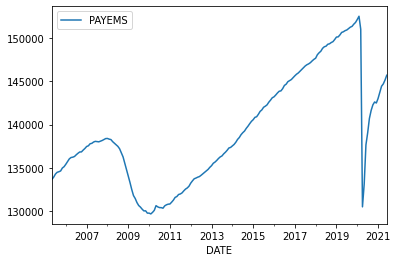

In [ ]:
df.plot() #plot the data then can right click the image-Copy and Paste into your doc 

How about job losses? On https://fred.stlouisfed.org/categories search for 'job losses on layoff' yields LNS13023653 and 'Permanent Job Losers' is LNS13026638, so:

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['LNS13023653', 'LNS13026638'],
                    'fred', start, end)
df=df.rename(columns={"LNS13023653": "job losses on layoff", "LNS13026638": "perm job losses"})

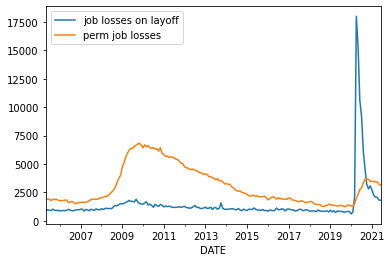

In [ ]:
df.plot()

What about a cross-section, say unemployment rate across NJ counties? Search for 'Unemployment Rate Atlantic County NJ' gets NJATLA2URN, and ''Unemployment Rate Atlantic County NJ' gets
NJCUMB2URN, so:


In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN'],
                    'fred', start, end)
df=df.rename(columns={"NJATLA2URN": "unemp atl", "NJCUMB2URN": "unemp cum"})

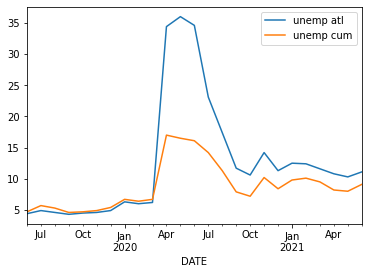

In [ ]:
df.plot()

Wow Atl got hit hard! Must be casinos, hotels, and dining! How about let's compare all of SJ at one point in time! So add few other counties:

NJATLA2URN atl

NJCUMB2URN cumberland

NJSALE5URN salem

NJGLOU5URN gloucester

NJCAMD7URN camden

NJBURL0URN burlington

NJCAPE1URN cape may

NJOCEA5URN ocean

And lets do pre-pandemic and after pandemic

In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2019, 6, 1)

dfPre = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPre=dfPre.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

#below is the same just 2020, and called "Post"
start = datetime.datetime (2020, 6, 1)
end = datetime.datetime (2020, 6, 1)

dfPost = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPost=dfPost.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

In [ ]:
dfPre

,atl,cum,sal,glo,cam,bur,cap may,ocean
DATE,,,,,,,,
2019-06-01,4.4,4.7,4.4,3.4,3.8,3.0,4.2,3.2


[]

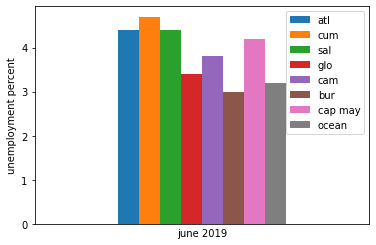

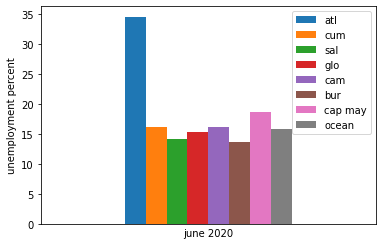

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

Interesting! Looks like there were similar and then atl shot up; but remember about scaling of y axis!, if you make both same scale:


[]

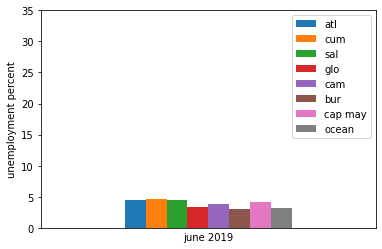

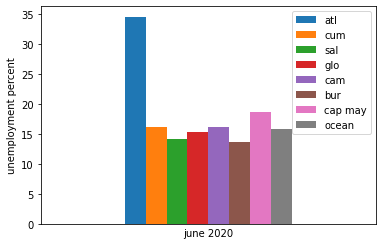

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])
ax.set_ylim(0,35)

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

#### World Bank
can actually search from within Py :)

In [ ]:
pdr.wb.search('gdp.*capita.*const')

,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10654,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10656,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10658,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10659,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [ ]:
dat = pdr.wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2015).stack().unstack(0)

In [ ]:
datNoInd=dat
datNoInd.index=dat.index.droplevel(-1)
datNoInd

country,Canada,Mexico,United States
year,,,
2005,40989.526824,8925.236669,52789.731419
2006,41646.414637,9200.402581,53738.091725
2007,42097.435120,9288.162478,54299.617241
2008,42063.633052,9276.054837,53854.160612
2009,40368.292037,8677.758293,51996.183495
2010,41155.323638,9001.686162,52963.464170
2011,42036.997844,9199.146032,53394.861838
2012,42315.807389,9401.977909,54213.459552
2013,42846.284196,9404.596280,54830.784066


Text(0.5, 1.0, 'my title')

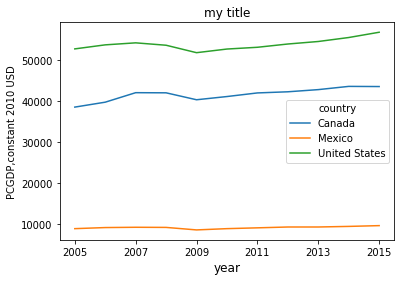

In [ ]:
ax=datNoInd.plot()
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('PCGDP,constant 2010 USD', fontsize=10)
ax.set_title('my title')

Now imagine you want to compare GDP to the Unemployment rate.

In [ ]:
pdr.wb.search('unemp.*').iloc[:,:2]

,id,name
947,9.0.Unemp.All,Unemployed (%)
948,9.0.Unemp.B40,Unemployed-Bottom 40 Percent (%)
949,9.0.Unemp.T60,Unemployed-Top 60 Percent (%)
965,9.1.Unemp.All,"Unemployed (%), Male"
966,9.1.Unemp.B40,"Unemployed-Bottom 40 Percent (%), Male"
...,...,...
17761,per_lm_alllm.cov_q1_tot,Coverage of unemployment benefits and ALMP in ...
17765,per_lm_alllm.cov_q2_tot,Coverage of unemployment benefits and ALMP in ...
17769,per_lm_alllm.cov_q3_tot,Coverage of unemployment benefits and ALMP in ...
17773,per_lm_alllm.cov_q4_tot,Coverage of unemployment benefits and ALMP in ...


In [ ]:
dat = pdr.wb.download(indicator=['NY.GDP.PCAP.KD','SL.UEM.TOTL.NE.ZS'], country=['US', 'CA', 'MX'], start=2015, end=2020)

In [ ]:
#dat
#lets sort it by year within each country
dat=dat.sort_values(['country', 'year'], ascending=[True, True])
dat

NY.GDP.PCAP.KD  SL.UEM.TOTL.NE.ZS
country       year                                   
Canada        2015    43596.135537               6.91
              2016    43536.913403               7.00
              2017    44325.488337               6.34
              2018    44917.483728               5.83
              2019    45109.244486               5.66
              2020    42258.691017               9.46
Mexico        2015     9753.380048               4.31
              2016     9897.150062               3.86
              2017     9997.686914               3.42
              2018    10120.363543               3.27
              2019    10013.703192               3.48
              2020     9147.053505               4.45
United States 2015    56762.729452               5.28
              2016    57292.538783               4.87
              2017    58207.578310               4.36
              2018    59607.393660               3.90
              2019    60698.011299               3.67
              2020    58453.446128               8.05

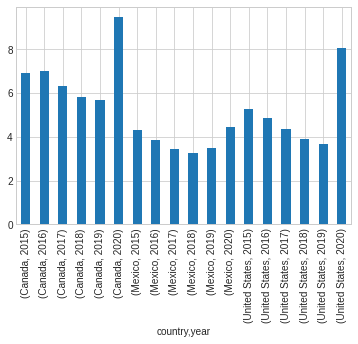

In [ ]:
ax=dat['SL.UEM.TOTL.NE.ZS'].plot(kind="bar")

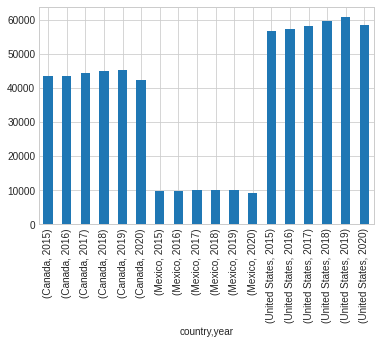

In [ ]:
ax=dat['NY.GDP.PCAP.KD'].plot(kind="bar")


# <font color='red'>>>>will be updated from here on>>></font>

# VIS

[LATER/MAYBE spin this off as a separate notebook; and GIS separate too]

this is the core of the class; we'll spend the rest of it on vis

we'll mostly base it on galleries as listed in syllabus:

https://theaok.github.io/vis/#galleries

<br>
we first cover vis tables, then setup/custimozation/tailoring with matplotlib and then main part of the course: examples/galleries by theme/approach; then at the end we'll do 3d, java d3, interactive plotly and maps

## [feb8] vis tables
before getting into actual graphs we start by coloring tables :) 
(and can export to xls, tex, html)

REF:
https://pandas.pydata.org/docs/user_guide/style.html#

In [ ]:
urllib.request.urlretrieve("https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download", "auto.dta")
auto=pd.read_stata('auto.dta') 

('auto.dta', <http.client.HTTPMessage at 0x7f13911d7460>)

In [ ]:
cm = sns.light_palette("green", as_cmap=True)
auto[:10].style.background_gradient(cmap=cm)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.000000,2.500000,11,2930,186,40,121,3.580000,Domestic
1,AMC Pacer,4749,17,3.000000,3.000000,11,3350,173,40,258,2.530000,Domestic
2,AMC Spirit,3799,22,nan,3.000000,12,2640,168,35,121,3.080000,Domestic
3,Buick Century,4816,20,3.000000,4.500000,16,3250,196,40,196,2.930000,Domestic
4,Buick Electra,7827,15,4.000000,4.000000,20,4080,222,43,350,2.410000,Domestic
5,Buick LeSabre,5788,18,3.000000,4.000000,21,3670,218,43,231,2.730000,Domestic
6,Buick Opel,4453,26,nan,3.000000,10,2230,170,34,304,2.870000,Domestic
7,Buick Regal,5189,20,3.000000,2.000000,16,3280,200,42,196,2.930000,Domestic
8,Buick Riviera,10372,16,3.000000,3.500000,17,3880,207,43,231,2.930000,Domestic
9,Buick Skylark,4082,19,3.000000,3.500000,13,3400,200,42,231,3.080000,Domestic


In [ ]:
auto[:5].style.text_gradient(cmap=cm) #mayeb better, more delicate

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.000000,2.500000,11,2930,186,40,121,3.580000,Domestic
1,AMC Pacer,4749,17,3.000000,3.000000,11,3350,173,40,258,2.530000,Domestic
2,AMC Spirit,3799,22,nan,3.000000,12,2640,168,35,121,3.080000,Domestic
3,Buick Century,4816,20,3.000000,4.500000,16,3250,196,40,196,2.930000,Domestic
4,Buick Electra,7827,15,4.000000,4.000000,20,4080,222,43,350,2.410000,Domestic


In [ ]:
auto[:10].style.bar(subset=['mpg', 'price'], color='#d65f5f') #bar chart

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.000000,2.500000,11,2930,186,40,121,3.580000,Domestic
1,AMC Pacer,4749,17,3.000000,3.000000,11,3350,173,40,258,2.530000,Domestic
2,AMC Spirit,3799,22,nan,3.000000,12,2640,168,35,121,3.080000,Domestic
3,Buick Century,4816,20,3.000000,4.500000,16,3250,196,40,196,2.930000,Domestic
4,Buick Electra,7827,15,4.000000,4.000000,20,4080,222,43,350,2.410000,Domestic
5,Buick LeSabre,5788,18,3.000000,4.000000,21,3670,218,43,231,2.730000,Domestic
6,Buick Opel,4453,26,nan,3.000000,10,2230,170,34,304,2.870000,Domestic
7,Buick Regal,5189,20,3.000000,2.000000,16,3280,200,42,196,2.930000,Domestic
8,Buick Riviera,10372,16,3.000000,3.500000,17,3880,207,43,231,2.930000,Domestic
9,Buick Skylark,4082,19,3.000000,3.500000,13,3400,200,42,231,3.080000,Domestic


In [ ]:
#and can export it in html onto hard drive
#html=auto.style.background_gradient(cmap=plt.cm.Greens).render() #color-code with Greens
html=auto.style.background_gradient(cmap=plt.cm.hot).render() #reds
f = open('auto.html','w'); f.write(html); f.close() #can have multiple commands in one line with ';'
files.download('auto.html') #your os will probably prompt you to open in webbrowser, do it

94476

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#can color any table output, say corr matrix
auto.corr().round(2)

,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio
price,1.00,-0.47,0.01,0.11,0.31,0.54,0.43,0.31,0.49,-0.31
mpg,-0.47,1.00,0.40,-0.41,-0.58,-0.81,-0.80,-0.72,-0.71,0.62
rep78,0.01,0.40,1.00,-0.15,-0.16,-0.40,-0.36,-0.50,-0.41,0.41
headroom,0.11,-0.41,-0.15,1.00,0.66,0.48,0.52,0.42,0.47,-0.38
trunk,0.31,-0.58,-0.16,0.66,1.00,0.67,0.73,0.60,0.61,-0.51
weight,0.54,-0.81,-0.40,0.48,0.67,1.00,0.95,0.86,0.89,-0.76
length,0.43,-0.80,-0.36,0.52,0.73,0.95,1.00,0.86,0.84,-0.70
turn,0.31,-0.72,-0.50,0.42,0.60,0.86,0.86,1.00,0.78,-0.68
displacement,0.49,-0.71,-0.41,0.47,0.61,0.89,0.84,0.78,1.00,-0.83
gear_ratio,-0.31,0.62,0.41,-0.38,-0.51,-0.76,-0.70,-0.68,-0.83,1.00


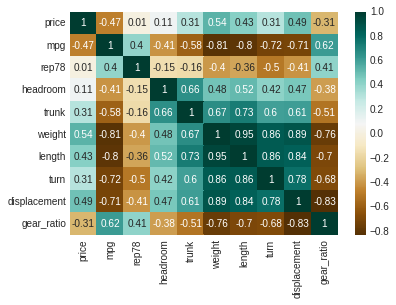

In [ ]:
sns.heatmap(auto.corr().round(2),cmap="BrBG",annot=True) #love the colors!

## basics / setup with matplotlib

matplotlib is Py main vis library, and other libraries (eg pandas, seaborn) run on the top of it; it gives you max power and customization

graphing is easy in Py, but often want that extra  customization and be able to tailor all the parts--we'll start with a look under the hood to have an awesome flexibility with matplotlib

having covered setup/customization/tailoring with matplotlib we will then move to main examples by theme in next sections--note: all graphs are native matplotlib unless indicated otherwhise

MAIN REF:
https://matplotlib.org/stable/gallery/index.html


REFS:

neat and useful
https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html

dry and not so useful
https://wesmckinney.com/book/plotting-and-visualization.html

great ref for fine tuning/customization[link text](https://)
https://nbviewer.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb




<br> 
sidenote on  pandas graphs:
<font size="1"> 
since we started the class with pandas for data management, we could also use pandas for vis, syntax is easy/user-friendly; BUT since pandas just runs on the top of matplotlib and  deeper customization is done in matplotlib, we will just stick with matplotlib as much as possible!
pandas has one main plot function that can produce all sorts of plots: http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
REFS: see pandas galleries https://theaok.github.io/vis/#galleries
</font> 

In [ ]:
!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download
auto=pd.read_stata('auto.dta'); auto.head(2)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


In [ ]:
#basic setup for graphing
plt.style.use('seaborn-whitegrid') #  'seaborn-white'
#plt.style.use('classic')
#may be needed to function well in jupyter:
%matplotlib notebook 
%matplotlib inline

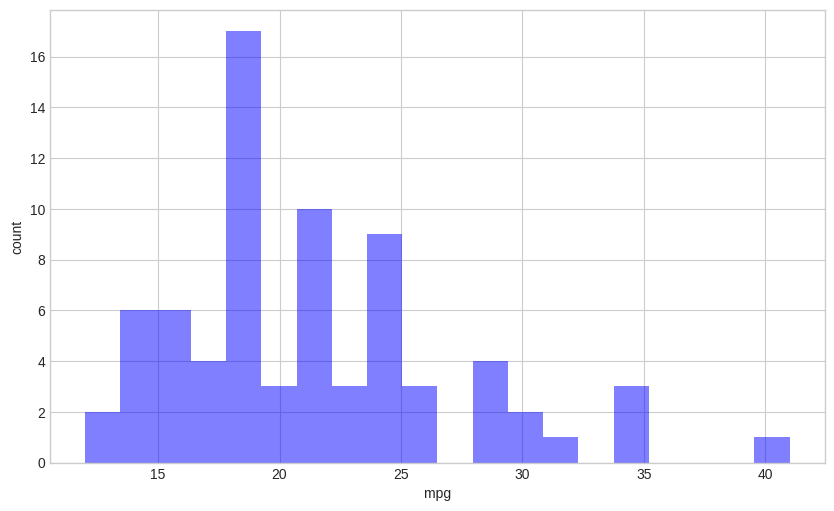

In [ ]:
#main options/customizations; more later in advanced matplotlib
#detailed ref per customization: https://nbviewer.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

#oneliner quick setup:
fig, ax = plt.subplots(figsize = (10, 6),dpi=100)
#detailed setup (useful for inset(later)):
#fig = plt.figure(figsize=(10,6),dpi=100) #Plots in matplotlib reside within a Figure object
#ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1) #ax = plt.axes() #make axes

#ax.set_title('my title')
ax.set_xlabel("mpg")  #remember always all axes must be labelled
ax.set_ylabel("count")
#put some plot in it, eg:
ax.hist(auto.mpg,alpha=.5,bins=20,color='blue')
#ax.scatter(auto.price,auto.weight, c='black', s=30, alpha=0.3)
#ax.legend(["blah"],loc=0) #0 soft decides; 1-4 corners; more options
#ax.set_ylim([0,50])
#ax.set_xlim([0,50])
#ax.set_xticks([10, 20, 50])
#ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$'], fontsize=18)
plt.show(); #may need it depends on os/interface/browser #semilcolon supreses intermediary output
#plt.savefig('fig.pdf', dpi=200) #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff 

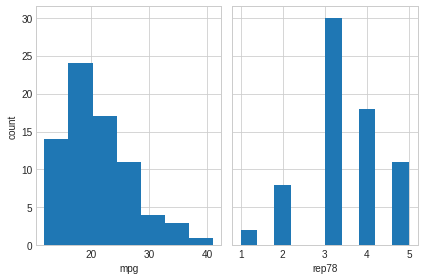

In [ ]:
#subplots
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True) #1row2col
axs[0].hist(auto.mpg, bins=7) #edgecolor="black" ,color="green" histtype=u'step' alpha=.5
#can do categorical var hist too: auto.rep78.value_counts() #same as bar chart
axs[1].hist(auto.rep78) 
axs[0].set_ylabel('count')
axs[0].set_xlabel('mpg')
axs[1].set_xlabel('rep78');

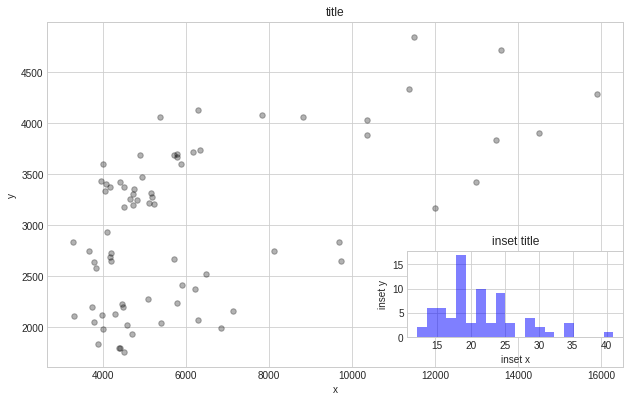

In [ ]:
#inset figure love it! looks like nature or science or pnas etc
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax2 = fig.add_axes([0.6, 0.17, 0.3, 0.2]) # inset axes
# main figure
ax1.scatter(auto.price,auto.weight, c='black', s=30, alpha=0.3)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')
# inset
ax2.hist(auto.mpg,alpha=.5,bins=20,color='blue')
ax2.set_xlabel('inset x')
ax2.set_ylabel('inset y')
ax2.set_title('inset title');

## distribution / histograms                         
when you have one var (or many vars or many subgroups of one variable) and what to show their distribution/spread

couple choices here: hist, boxplot, and violinplots; don't use all of them, just pick one, probably best to just stick with hist

note: overdoing with varieties of graphs here just to practice different setups, especially subplots; in your work be parsimonious


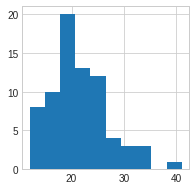

In [ ]:
fig, ax = plt.subplots(figsize = (3, 3)); ax.hist(auto.mpg);

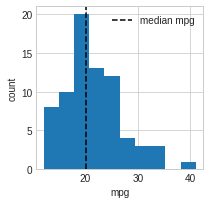

In [ ]:
# in general very useful to additionally mark interesting stuff in a graph (more on this later)
fig, ax = plt.subplots(figsize = (3, 3))
ax.hist(auto.mpg)
#bins=7 edgecolor="black" color="green" color="#69b3a2" histtype=u'step' alpha=.5
medMpg=auto.mpg.median()
ax.axvline(medMpg, color="black", ls="--", label="median mpg")
ax.set_xlabel('mpg')
ax.set_ylabel('count')
ax.legend(); ###pandas: auto[['price']].plot(kind='hist', bins=5)

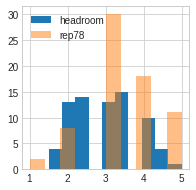

In [ ]:
fig, ax = plt.subplots(figsize = (3, 3))
ax.hist(auto.headroom)
ax.hist(auto.rep78,alpha=.5)
ax.legend(('headroom', 'rep78'), loc='upper left');

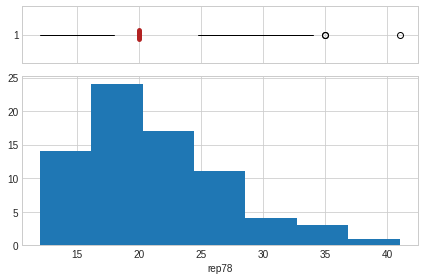

In [ ]:
#boxplots, convey similar info to histograms
fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True,
    gridspec_kw={'height_ratios': [1, 3]}) #2row1col
axs[0].boxplot(auto.mpg, vert=False, medianprops=dict(linewidth=5,color='firebrick'),
     showbox=False, showcaps=False) #tufte style
axs[1].hist(auto.mpg, bins=7) #edgecolor="black" ,color="green" histtype=u'step' alpha=.5
axs[1].set_xlabel('rep78');
#boxplot customization: https://matplotlib.org/stable/gallery/statistics/bxp.html

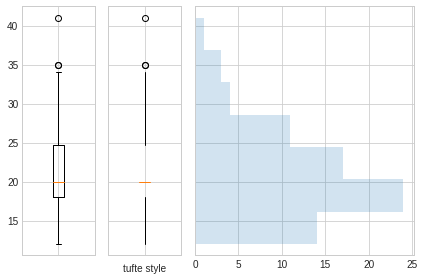

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True,
    gridspec_kw={'width_ratios': [1,1,3]})
axs[0].boxplot(auto.mpg)
axs[1].boxplot(auto.mpg,showbox=False, showcaps=False)
axs[2].hist(auto.mpg, bins=7,orientation='horizontal',alpha=.2)
axs[1].set_xlabel('tufte style')
axs[0].set_xticklabels('')
axs[1].set_xticklabels('');

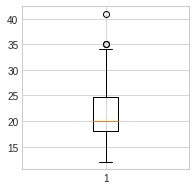

In [ ]:
fig, ax = plt.subplots(figsize = (3, 3)); ax.boxplot(auto.mpg);

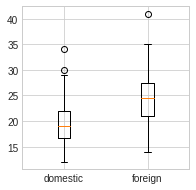

In [ ]:
#subset by categories; of course foreing have better mpg 
fig1, ax1 = plt.subplots(figsize = (3, 3))
ax1.boxplot(auto.mpg[auto.foreign=="Domestic"], positions=[1])
ax1.boxplot(auto.mpg[auto.foreign=="Foreign"], positions=[2])
plt.xticks([1, 2], ['domestic', 'foreign']);

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


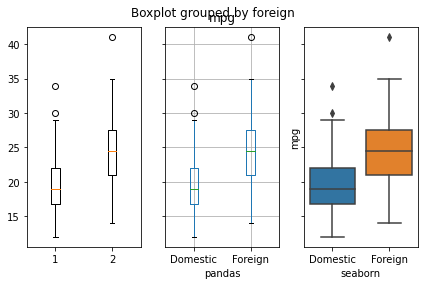

In [ ]:
#compare matplotlib with pandas and seaborn--easy to subset on categories
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True,
    gridspec_kw={'width_ratios': [1,1,1]}) #note indentation bc it continues from line before
axs[0].boxplot(auto.mpg[auto.foreign=="Domestic"], positions=[1])
axs[0].boxplot(auto.mpg[auto.foreign=="Foreign"], positions=[2])
auto.boxplot(column='mpg',by='foreign',ax=axs[1]) #adding subplots with ax=
sns.boxplot(x='foreign', y='mpg', data=auto,ax=axs[2]) #here too
axs[1].set_xlabel('pandas')
axs[2].set_xlabel('seaborn');
# another pandas example: auto.boxplot(column='mpg',by='rep78',vert=False), plt.show()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,longHeavy
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic,False
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic,False
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic,False
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic,True
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,23,4.0,2.5,12,2160,172,36,97,3.74,Foreign,False
70,VW Diesel,5397,41,5.0,3.0,15,2040,155,35,90,3.78,Foreign,False
71,VW Rabbit,4697,25,4.0,3.0,15,1930,155,35,89,3.78,Foreign,False
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign,False


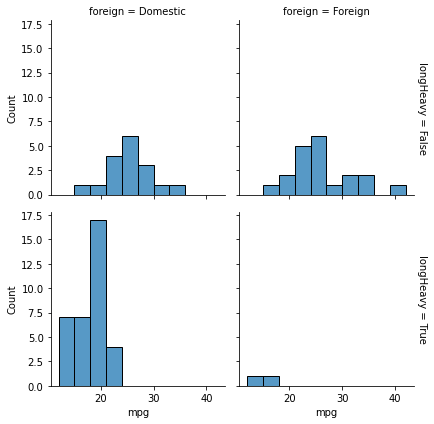

In [ ]:
#seaborn is really easy for complex subsetting; first gen a dummy:
auto['longHeavy'] = (auto.weight >= auto.weight.mean()) & (auto.length >= auto.length.mean())
auto #make sure dummy makes sense, sort on foreign

sns.displot(
    auto, x="mpg", col="foreign", row="longHeavy",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

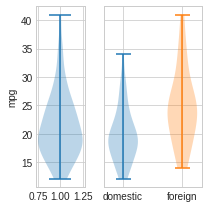

In [ ]:
#violinplots https://www.scaler.com/topics/matplotlib/violin-plot-matplotlib/
# cool examples: https://stackabuse.com/matplotlib-violin-plot-tutorial-and-examples/
fig, axs = plt.subplots(1, 2, figsize = (3, 3), sharey=True, tight_layout=True,
    gridspec_kw={'width_ratios': [1,2]}) 
axs[0].violinplot(auto.mpg)
axs[0].set_ylabel('mpg')
axs[1].violinplot(auto.mpg[auto.foreign=="Domestic"], positions=[1])
axs[1].violinplot(auto.mpg[auto.foreign=="Foreign"], positions=[2])
plt.xticks([1, 2], ['domestic', 'foreign']);

In [ ]:
# and then there's ridgline, but the code is like sending a rocket to the outer space
# https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/

 in general, always good to know distribution of your key vars,  so once you load the data,
 one of the first things to do is to subset data to key vars [rule of simplicity/cleanliness], and get histograms for all of them--traditionally you'd get basic sum stats like mean median mode std dev and range--but with hist you get all of that and more in a vis that's easier and faster comprehended :)

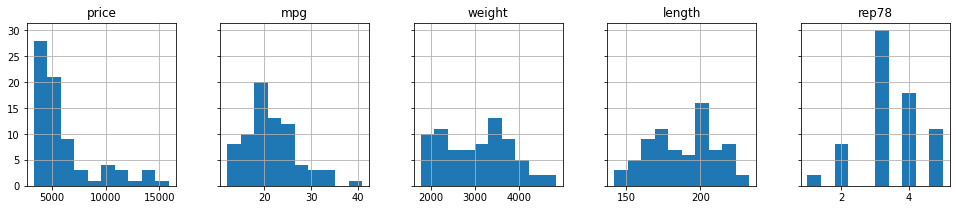

In [ ]:
#eg:
aut=auto[['price','mpg','weight','length','rep78','foreign']] #subset to key vars
aut.hist(sharey=True,figsize=(20,3),layout=(1,6)); #note different setup from earlier:
#put options into graph as opposed to earlier upfront; fligured them out with autocomplete feature:
#just put cursor into auto.hist() and it gives you options :) 

## ranking / bar charts
some of the most useful charts; use them a lot; one of the most underutilized vis

<br>

much more versatility here than with distributions that are only about one var (unless multiple distributions and/or by groups) but here typically with bar charts can show a ton of relationships between multiple vars, and make things quite complex

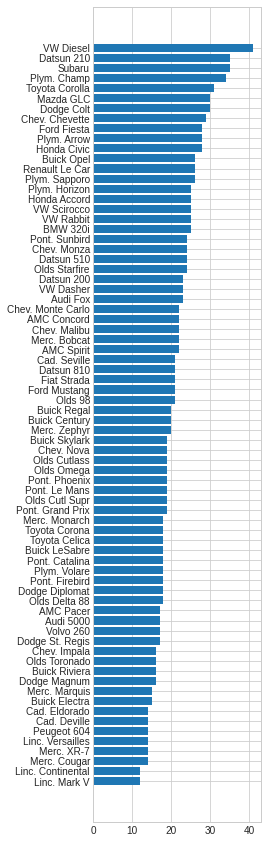

In [ ]:
#bar chart is a great replacement for a list, even say upto 100 elements; always sort
#fig, ax = plt.subplots(figsize = (3, 3)); ax.bar(auto.foreign,auto.mpg);
auto = auto.sort_values('mpg') #usually useful to sort on var of interest
fig, ax = plt.subplots(figsize=(3,15)); ax.barh(auto.make,auto.mpg);

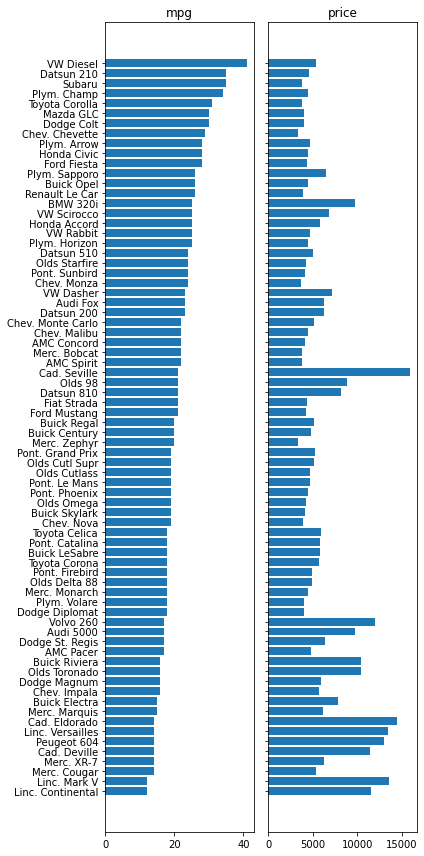

In [ ]:
auto=auto.sort_values(['mpg', 'price'], ascending=[True, True])
fig, axs = plt.subplots(1, 2, figsize = (6, 12), sharey=True, tight_layout=True,
    gridspec_kw={'width_ratios': [1,1]}) 
axs[0].barh(auto.make,auto.mpg)
axs[0].set_title('mpg')
axs[1].barh(auto.make,auto.price)
axs[1].set_title('price');

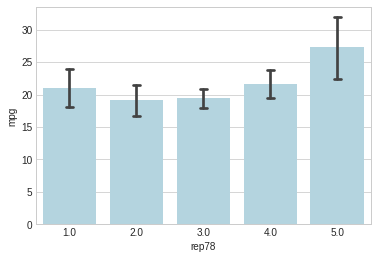

In [ ]:
#useful to calc sum stats such as mean and have error bars
#easily done in seaborn #note that fewer obs like on 5, bigger CI
ax = sns.barplot(x="rep78", y="mpg", data=auto, estimator=np.mean, ci=95, capsize=.1, color='lightblue')

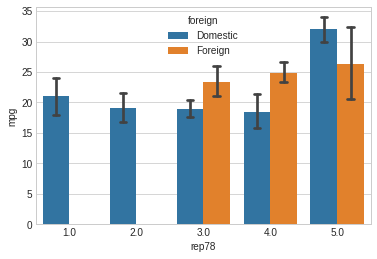

In [ ]:
#summary stats such as mean of var on y axis by categories on x axis 
#and possibly 3rd var as colors of bars is a true workhorse--use it a lot, 
#should have at least several of those--they can really get some insights
#simplest bar chart is 2 vars, but can subgroup by another var and can calc sum stats such as mean
sns.barplot(data=auto, x='rep78', y='mpg', hue='foreign',estimator=np.mean, ci=95, capsize=.1, orient='v');

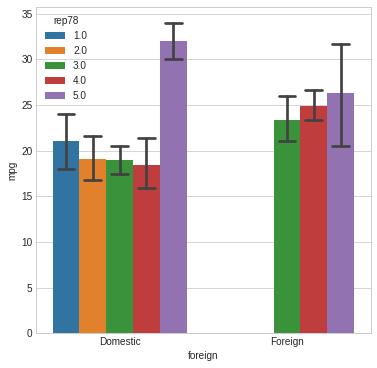

In [ ]:
# flip x with hue helps answer differnt question and find different insights
# previously the graph focuses on domestic-foreign diff within each rep78:
# rep78 1,2: no foreign; rep78 3,4: foreign higher mpg than domestic
# and rep78 5th cat, the other way round: higher mpg for domestic 

#the 2nd setup focuses on comparisons within each domestic and foreign and across rep78:
# mpg on rep78 lower cat for domestic is much smaller than rep78 5
# among foreign cars not much difference across cat or rep78
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data=auto, x='foreign', y='mpg', hue='rep78',estimator=np.mean, ci=95, capsize=.1, orient='v',ax=ax);

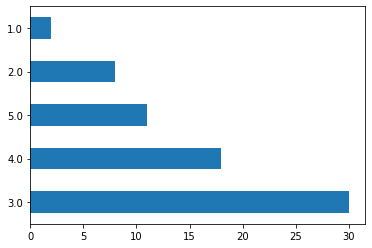

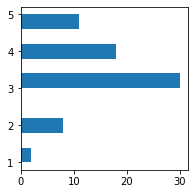

In [ ]:
#pandas bar charts; skip; just use matplotlib or seaborn
#ax=auto[['make', 'price']][0:3].plot(kind='barh')
#ax.set_yticklabels(auto.make);
#ax=auto[['make', 'price','weight']][0:5].plot(kind='barh') #stacked=True                                                           
#ax.set_yticklabels(auto.make); 

#btw for a categorical variable histogram looks like a bar chart, but bar chart has at least 2vars, hist can be 1
auto.rep78.value_counts().plot(kind='barh') # counts/freq by cat #pandas
fig, ax = plt.subplots(figsize = (3, 3)); ax.hist(auto.rep78,orientation='horizontal');

foreign,Domestic,Foreign
rep78,,
1.0,2,0
2.0,8,0
3.0,27,3
4.0,9,9
5.0,2,9


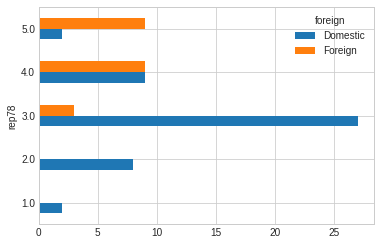

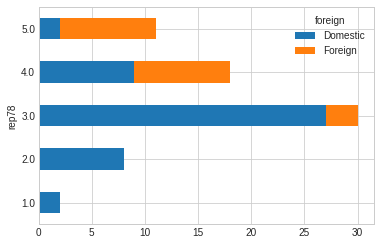

In [ ]:
#for continuous vars, at least ordinal do scatterplots; for nominal vars relationships do crosstabs:
pd.crosstab(auto["rep78"], auto["foreign"])
pd.crosstab(auto["rep78"], auto["foreign"]).plot(kind='barh')
pd.crosstab(auto["rep78"], auto["foreign"]).plot(kind='barh',stacked=True)

## relationship / scatter plots 

especially for continuous vars or at least ordinal; note can have more than 2 vars in scatterplots



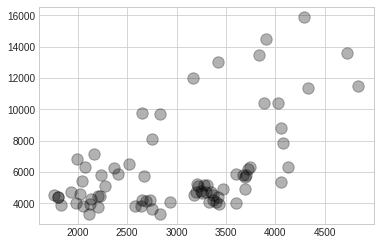

In [ ]:
#basic scatterplot
plt.scatter(auto.weight,auto.price, c='black', s=130, alpha=0.3);plt.show()
###another way:
#plt.plot(auto.weight,auto.price, #specify vars
#  'o',color='black', # o tells it to make points (scatter)
#   markersize=10, alpha=0.3) #size and transparency

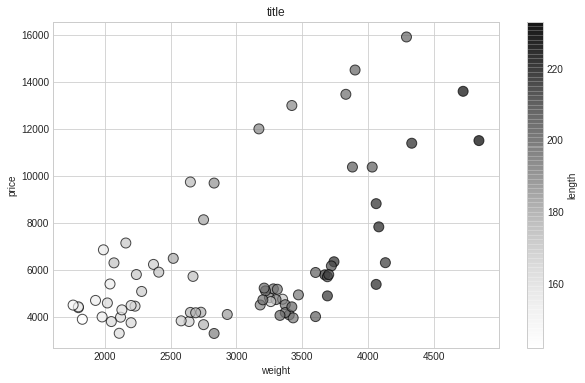

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
auto.plot.scatter(x='weight', y='price',c='length', s=100,alpha=0.7,edgecolors="black",ax=ax) 
plt.title("title");
#this is really neat! 
#a see http://stats.stackexchange.com/questions/11984/how-can-i-remove-the-z-order-bias-of-a-coloured-scatter-plot                                                                                                                              
#i love it! no way to do someting like that in stata! 
###btw could add 4th var as circle radius:
#https://seaborn.pydata.org/examples/scatterplot_sizes.html
#but its mess--need fewer cat! and need like RdYlGn

Text(2930, 22, 'Linc. Mark V')

Text(3350, 17, 'Linc. Continental')

Text(2640, 22, 'Merc. Cougar')

Text(3250, 20, 'Merc. XR-7')

Text(4080, 15, 'Linc. Versailles')

Text(3670, 18, 'Peugeot 604')

Text(2230, 26, 'Cad. Deville')

Text(3280, 20, 'Cad. Eldorado')

Text(3880, 16, 'Buick Electra')

Text(3400, 19, 'Merc. Marquis')

Text(4330, 14, 'Dodge Magnum')

Text(3900, 14, 'Buick Riviera')

Text(4290, 21, 'Olds Toronado')

Text(2110, 29, 'Chev. Impala')

Text(3690, 16, 'Dodge St. Regis')

Text(3180, 22, 'Volvo 260')

Text(3220, 22, 'Audi 5000')

Text(2750, 24, 'AMC Pacer')

Text(3430, 19, 'Olds Delta 88')

Text(2120, 30, 'Dodge Diplomat')

Text(3600, 18, 'Pont. Firebird')

Text(3600, 16, 'Plym. Volare')

Text(3740, 17, 'Pont. Catalina')

Text(1800, 28, 'Buick LeSabre')

Text(2650, 21, 'Toyota Celica')

Text(4840, 12, 'Toyota Corona')

Text(4720, 12, 'Merc. Monarch')

Text(3830, 14, 'Pont. Grand Prix')

Text(2580, 22, 'Olds Cutl Supr')

Text(4060, 14, 'Pont. Le Mans')

Text(3720, 15, 'Pont. Phoenix')

Text(3370, 18, 'Olds Omega')

Text(4130, 14, 'Olds Cutlass')

Text(2830, 20, 'Chev. Nova')

Text(4060, 21, 'Buick Skylark')

Text(3310, 19, 'Merc. Zephyr')

Text(3300, 19, 'Buick Century')

Text(3690, 18, 'Buick Regal')

Text(3370, 19, 'Olds 98')

Text(2730, 24, 'Ford Mustang')

Text(4030, 16, 'Fiat Strada')

Text(3260, 28, 'Datsun 810')

Text(1800, 34, 'Cad. Seville')

Text(2200, 25, 'AMC Spirit')

Text(2520, 26, 'Merc. Bobcat')

Text(3330, 18, 'Chev. Malibu')

Text(3700, 18, 'AMC Concord')

Text(3470, 18, 'Chev. Monte Carlo')

Text(3210, 19, 'Audi Fox')

Text(3200, 19, 'VW Dasher')

Text(3420, 19, 'Datsun 200')

Text(2690, 24, 'Olds Starfire')

Text(2830, 17, 'Datsun 510')

Text(2070, 23, 'Chev. Monza')

Text(2650, 25, 'Pont. Sunbird')

Text(2370, 23, 'BMW 320i')

Text(2020, 35, 'VW Rabbit')

Text(2280, 24, 'VW Scirocco')

Text(2750, 21, 'Honda Accord')

Text(2130, 21, 'Plym. Horizon')

Text(2240, 25, 'Plym. Sapporo')

Text(1760, 28, 'Renault Le Car')

Text(1980, 30, 'Buick Opel')

Text(3420, 14, 'Honda Civic')

Text(1830, 26, 'Plym. Arrow')

Text(2050, 35, 'Ford Fiesta')

Text(2410, 18, 'Chev. Chevette')

Text(2200, 31, 'Dodge Colt')

Text(2670, 18, 'Mazda GLC')

Text(2160, 23, 'Toyota Corolla')

Text(2040, 41, 'Plym. Champ')

Text(1930, 25, 'Subaru')

Text(1990, 25, 'Datsun 210')

Text(3170, 17, 'VW Diesel')

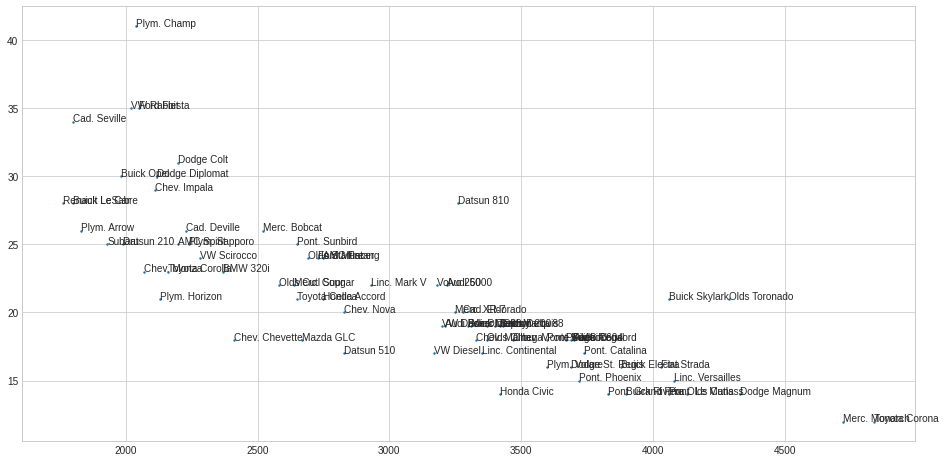

In [ ]:
# label points                                                                                      
fig, ax = plt.subplots(figsize=(16,8)) #make it wide so can read labels better
ax.scatter(auto['weight'],auto['mpg'],s=2)

for i, txt in enumerate(auto['make']):
    ax.annotate(txt, (auto['weight'][i],auto['mpg'][i]),fontsize=10);
#at least can id outliers; still many overlap, later we will cover zooming and popups

#another way
#def label_point_orig(x, y, val, ax):
#    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#    print(a)
#    for i, point in a.iterrows():
#        ax.text(point['x'], point['y'], str(point['val']),fontsize=7, color='black')
#
#plt.scatter(auto.weight, auto.length,s=5)
#label_point_orig(auto.weight, auto.length, auto.make, plt)
#lt.show()

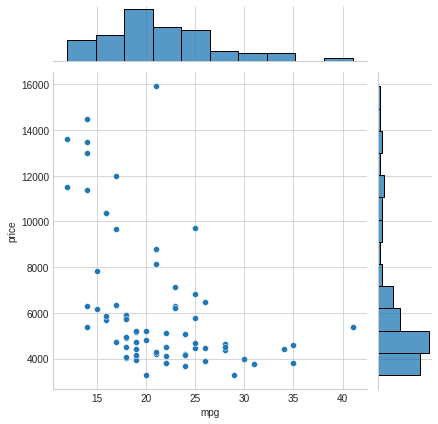

In [ ]:
sns.jointplot(x ='mpg', y ='price', data = auto) #, kind ='kde' #gotta love it!

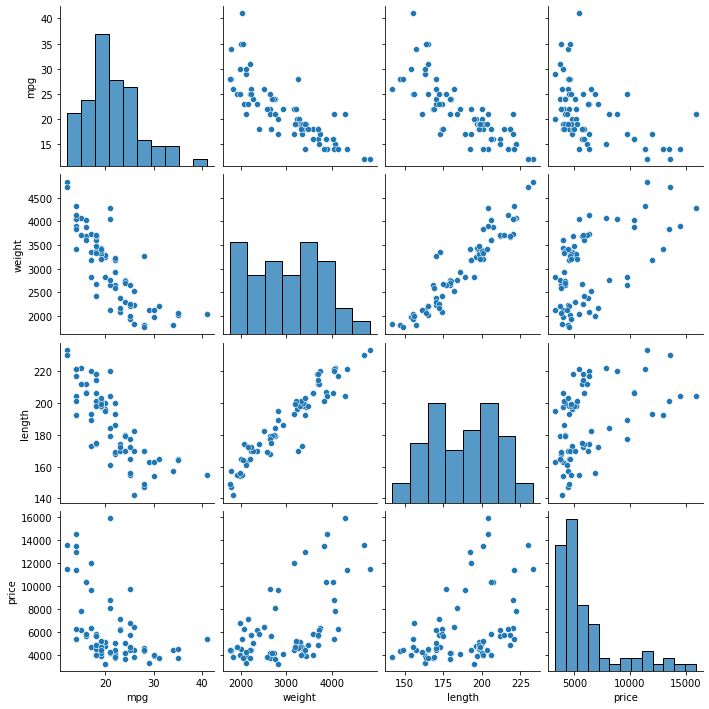

In [ ]:
#https://www.python-graph-gallery.com/correlogram/
sns.pairplot(df[['mpg','weight','length','price']])

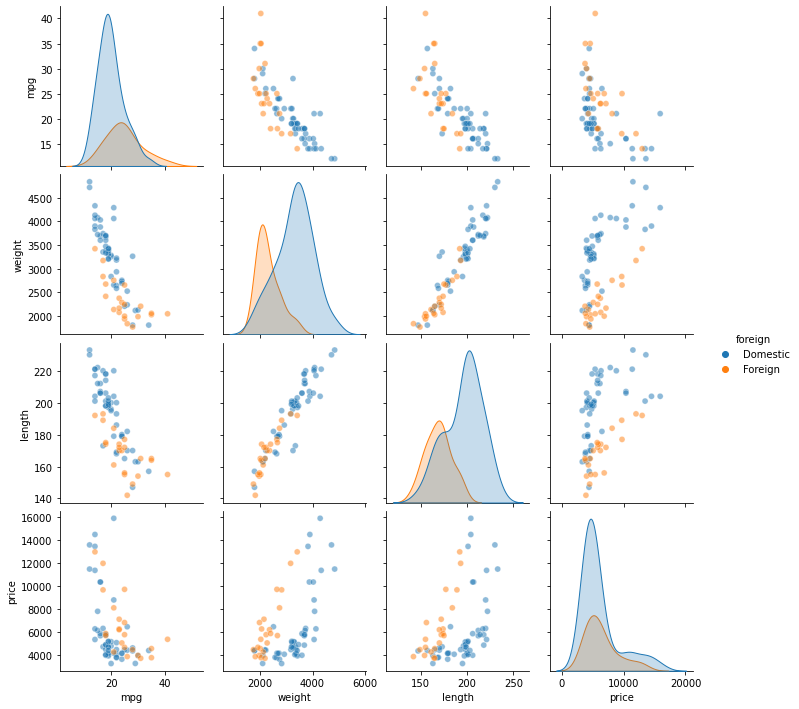

In [ ]:
sns.pairplot(df[['mpg','weight','length','price','foreign']],
             kind='scatter', plot_kws={'alpha': 0.5}, 
             hue='foreign')

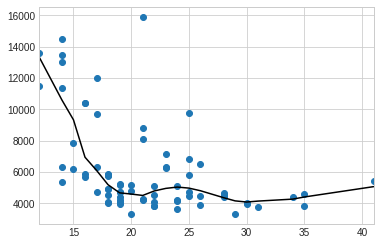

In [ ]:
#lowess useful to figure out nonlinearities in relationship
import statsmodels.api as sm
smoothed = sm.nonparametric.lowess(exog=auto.mpg, endog=auto.price, frac=0.3)

fig, ax = plt.subplots()
ax.scatter(auto.mpg,auto.price)
ax.plot(smoothed[:, 0], smoothed[:, 1], c="k")
plt.autoscale(enable=True, axis="x", tight=True)
#https://www.statsmodels.org/dev/examples/notebooks/generated/lowess.html
#https://james-brennan.github.io/posts/lowess_conf/
#https://stackoverflow.com/questions/31104565/confidence-interval-for-lowess-in-python
#https://stackoverflow.com/questions/42637579/how-to-compute-and-plot-a-lowess-curve-in-python

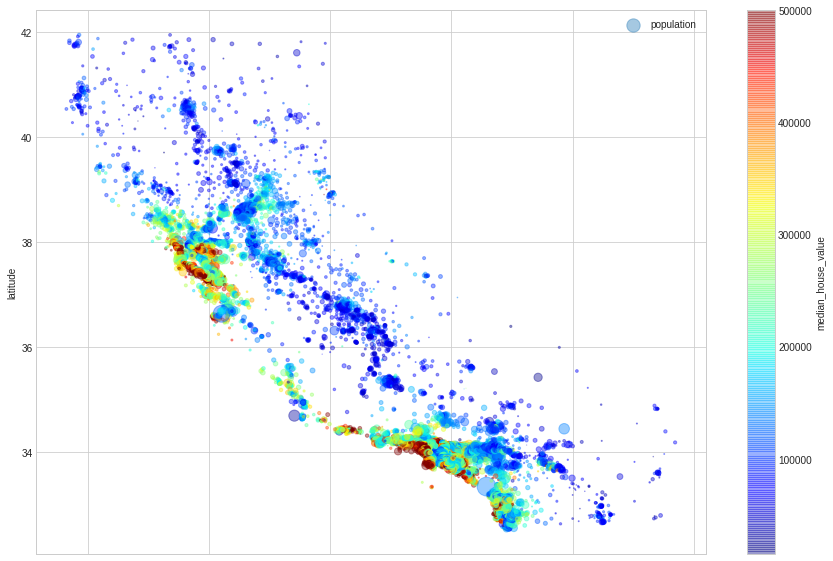

In [ ]:
#maps later but note that a simple scatter against lat and long gives a map :)
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population',
figsize=(15, 10), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

## clustering

clustering is about finding patterns and very much data sciency!

In [ ]:
df = auto[['make','mpg','weight','length','price','turn','displacement','trunk']].set_index('make') #' ,'rep78','gear_ratio'
#drop cat vars AND do some thinking!: retain vars theoretically linked

#can start with already covered colored list
cm = sns.light_palette("green", as_cmap=True)
df[:].style.background_gradient(cmap=cm)

,mpg,weight,length,price,turn,displacement,trunk
make,,,,,,,
Linc. Mark V,12,4720,230,13594,48,400,18
Linc. Continental,12,4840,233,11497,51,400,22
Merc. Cougar,14,4060,221,5379,48,302,16
Merc. XR-7,14,4130,217,6303,45,302,16
Linc. Versailles,14,3830,201,13466,41,302,15
Peugeot 604,14,3420,192,12990,38,163,14
Cad. Deville,14,4330,221,11385,44,425,20
Cad. Eldorado,14,3900,204,14500,43,350,16
Buick Electra,15,4080,222,7827,43,350,20


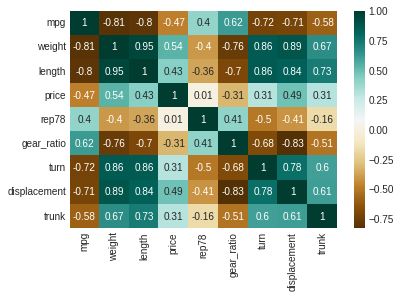

In [ ]:
#then can also do already covered corr mat
sns.heatmap(df.corr().round(2),cmap="BrBG",annot=True) #some hi corr--they will drive clustering

next we procede with dendograms to do clustering
https://www.python-graph-gallery.com/dendrogram/

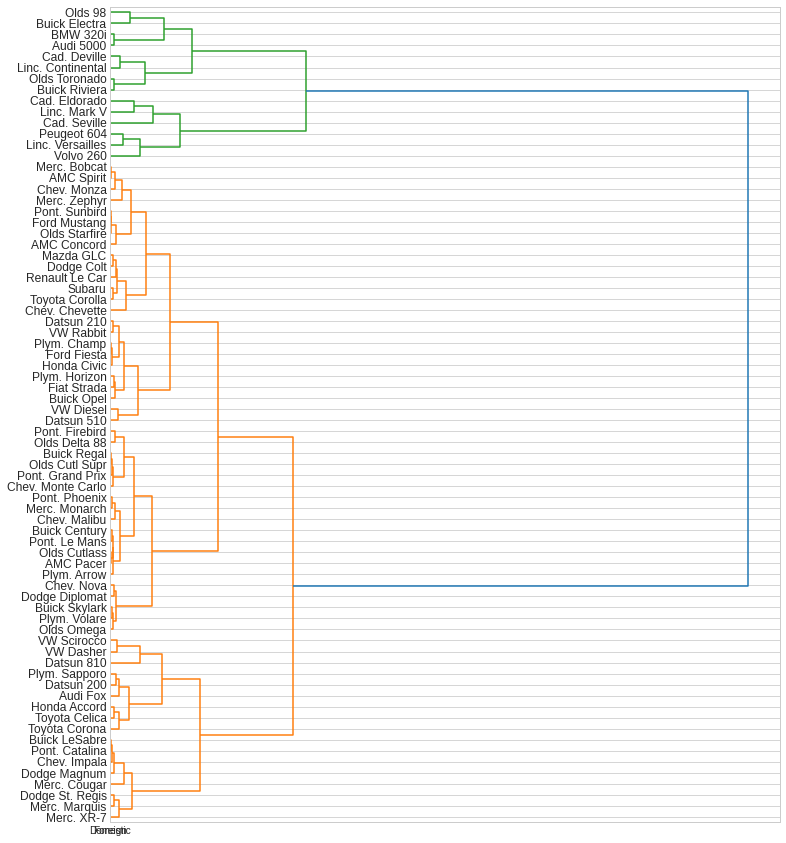

In [ ]:
fig, ax = plt.subplots(figsize = (12, 15)); ax.bar(auto.foreign,auto.mpg);
from scipy.cluster import hierarchy
Z = hierarchy.linkage(df, 'ward') # Calculate the distance between each sample
hierarchy.dendrogram(Z, orientation="right", labels=df.index,leaf_font_size=12,ax=ax);

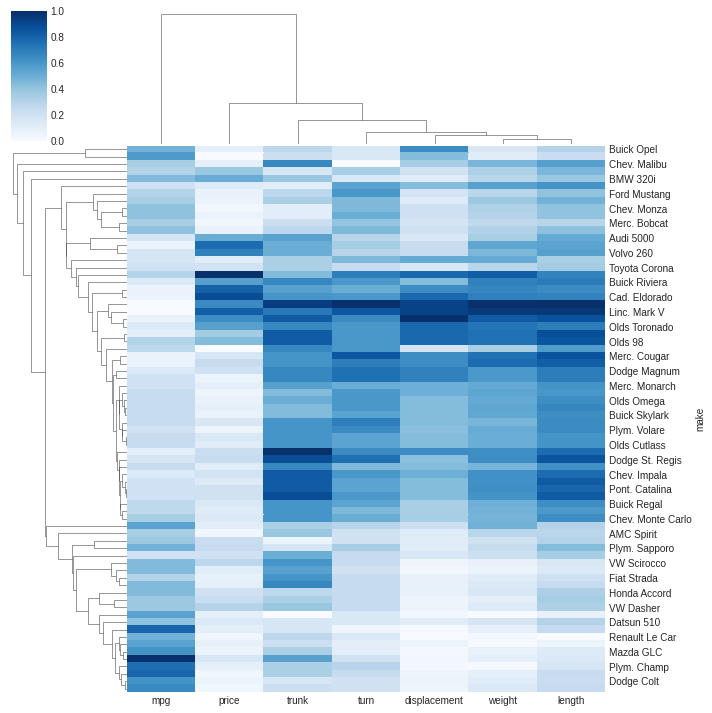

In [ ]:
sns.clustermap(df, metric="correlation", method="single", cmap="Blues", standard_scale=1) #, row_colors=row_colors)

at the top: weight goes with length--yes!

at left: american cars tend to go together
etc

## lineplots / time series data

when you have data over time, the first thing is to plot it as we did with API data (WB, FRED)

several variations on lineplots follow using time series data



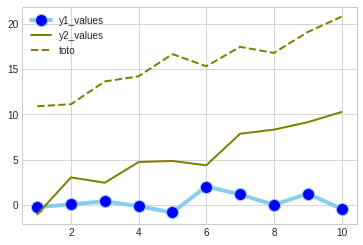

In [ ]:
#Line Chart with Several Lines
df=pd.DataFrame({'x_values': range(1,11), 'y1_values': np.random.randn(10), 'y2_values': np.random.randn(10)+range(1,11), 'y3_values': np.random.randn(10)+range(11,21) })
# multiple line plots
plt.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend();

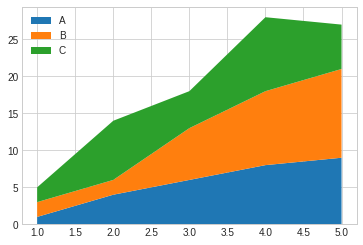

In [ ]:
#Basic Stacked Area Chart, eg worth of each of 3 big tech that adds up to total of 3
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left');

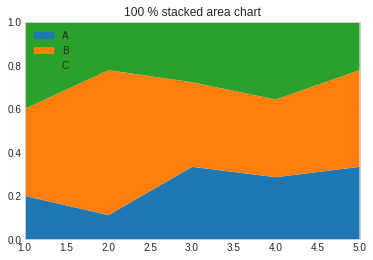

In [ ]:
#Percentage Stacked Area Chart, eg market share--always adds up to 100,
#but share of each company evolves over time
data = pd.DataFrame({  'group_A':[1,4,6,8,9], 'group_B':[2,24,7,10,12], 'group_C':[2,8,5,10,6], }, index=range(1,6))
 
data_perc = data.divide(data.sum(axis=1), axis=0) #transform data from raw to percent 
 
plt.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['A','B','C'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart');

## misc / maybe

https://www.python-graph-gallery.com/basic-sankey-diagram-with-pysankey

## awesome vis by others: exemplary examples

now that we have covered much of vis, time for you not just use it correctly, but use it to produce new knowledge, below some examples to inspire

graphs (usually simple!) producing great insight--what counts most is an idea!

[to find out more about the graph/research just google vis title]


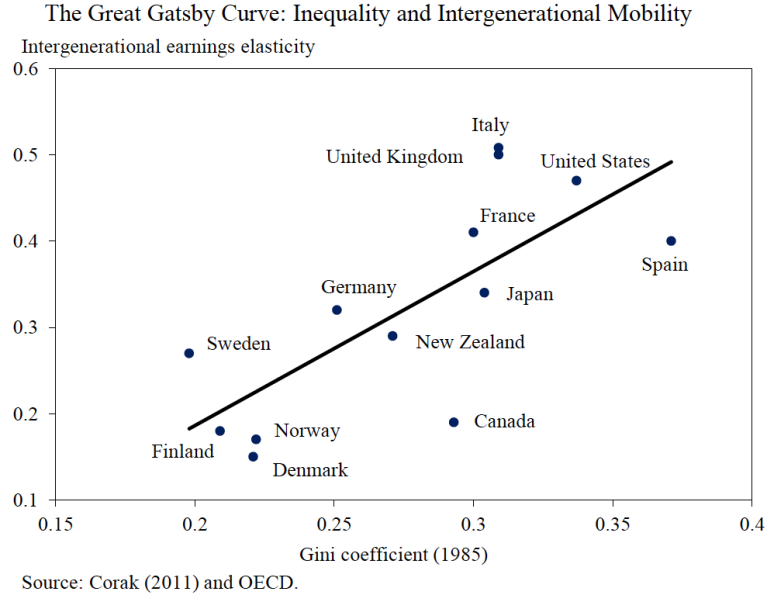

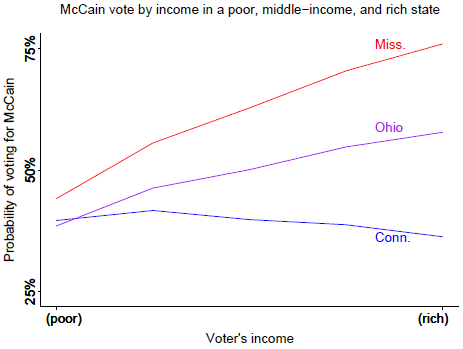

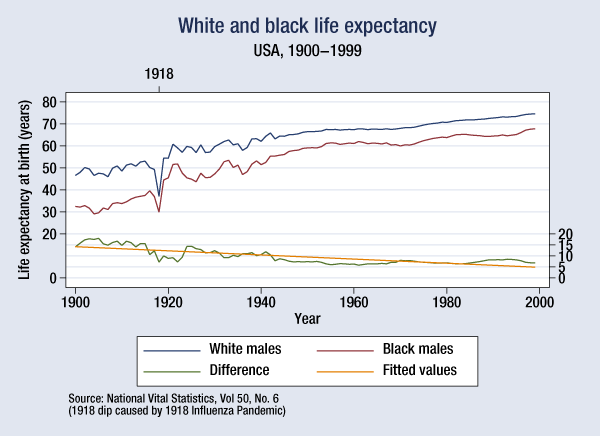

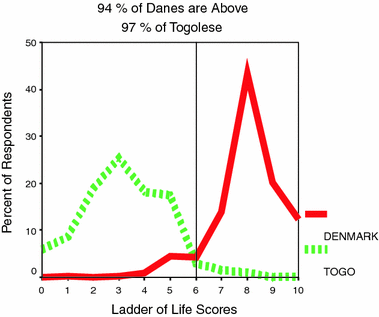

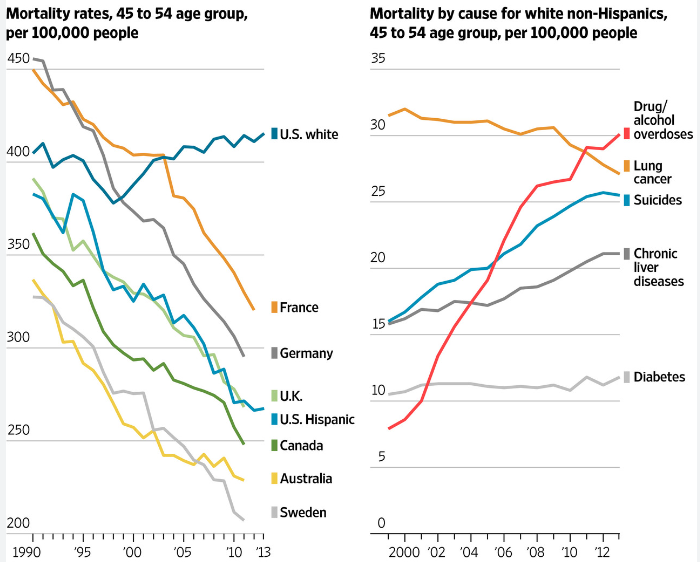

SF drug geography
https://nbviewer.org/github/lmart999/GIS/blob/master/SF_GIS_Crime.ipynb

and then just some examples per academic papers:

check out these awesome sci paper ready plots:
https://github.com/jbmouret/matplotlib_for_papers

and then i have one paper: 
https://theaok.github.io/junk/swbPopGroBrfss_againStudentComSwb.pdf
for which i have done vis in Py:
https://colab.research.google.com/drive/1fFzDc73LbGAC-G6_I58FV1fH691NAs7_?usp=sharing

# >>> TODO pick up editing here

## adavanced matplotlib: grids, subplots, layout, and markers                            


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b881449d0>,
      dtype=object)

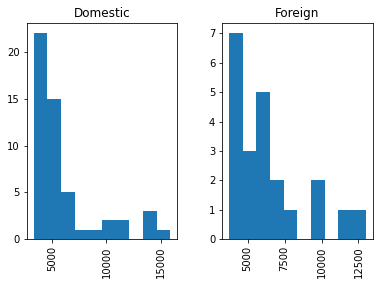

In [ ]:
# sometimes can simply add 'by', but for some plots only                                                                           
auto.price.hist(by=auto.foreign);plt.show()

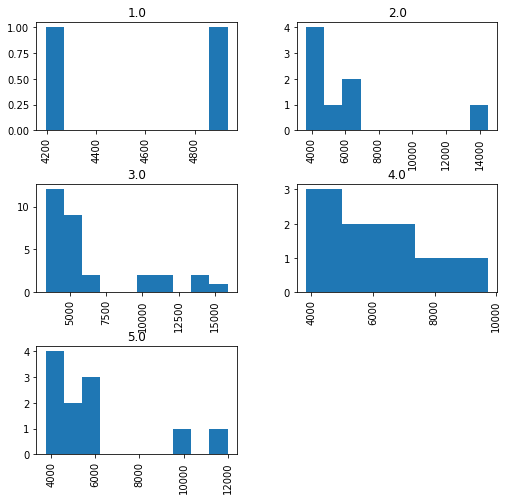

In [ ]:
auto.price.hist(by=auto.rep78, figsize=(8, 8)); plt.show()


Text(0.5, 0.98, 'bold figure suptitle')

Text(0.5, 1.0, 'axes title')

Text(0.5, 0, 'xlabel')

Text(0, 0.5, 'ylabel')

Text(3, 8, 'boxed italics text in data coords')

Text(2, 6, 'an equation: $E=mc^2$')

Text(3, 4, 'annotate')

(0.0, 10.0, 0.0, 10.0)

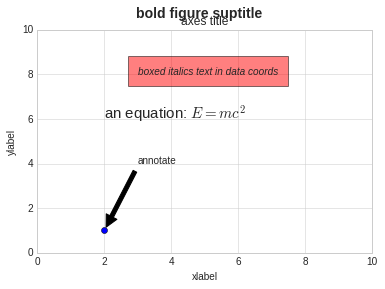

In [ ]:
### first adding text; http://matplotlib.org/users/text_intro.html                                                                 
#note that in stata can add tex too: scatter mpg price, text(20 1000 "hello", color(black)) 

#https://wesmckinney.com/book/plotting-and-visualization.html

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111) #1x1grid; 1st plot                                                                                       
#fig.subplots_adjust(top=0.85) #add spaing between title and ax title                                                              
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.plot([2], [1], 'o') #put a point                                                                                                
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4), #put arrow                                                                       
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10]) #axes 0-10   
#plt.scatter(auto.price,auto.weight, c='black', s=30, alpha=0.3)
#sns.heatmap(auto.corr().round(2),cmap="BrBG",annot=True) #love the colors!

plt.show()


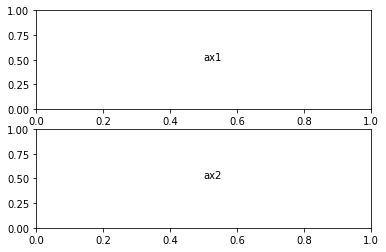

In [ ]:
### second, empty layout                                                                                                           


''' alternative ideas; skip                                                                                                        
plt.subplots(1, 2, figsize=(6, 4)); plt.subplots_adjust(wspace=0.3, hspace=.3);plt.show()                                          
                                                                                                                                   
following: http://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111              
                                                                                                                                   
#eg: 224=2x2 grid,4th subplot;    '234=2x3 grid, 4th subplot                                                                       
fig = plt.figure()                                                                                                                 
fig.add_subplot(221)   #top left                                                                                                   
fig.add_subplot(222)   #top right                                                                                                  
fig.add_subplot(223)   #bottom left                                                                                                
fig.add_subplot(224)   #bottom right                                                                                               
plt.show()                                                                                                                         
                                                                                                                                   
fig = plt.figure()                                                                                                                 
fig.add_subplot(221)   #top left                                                                                                   
fig.add_subplot(222)   #top right                                                                                                  
fig.add_subplot(224)   #bottom right                                                                                               
plt.show()                                                                                                                         
'''
fig = plt.figure()
ax1 = plt.subplot2grid((2,1), (0,0)); ax1.text(.5,.5,'ax1') #2x1grid; 0,0 graph                                                    
ax2 = plt.subplot2grid((2,1), (1,0)); ax2.text(.5,.5,'ax2') #2x1grid; 1,0 graph                                                    
plt.show()

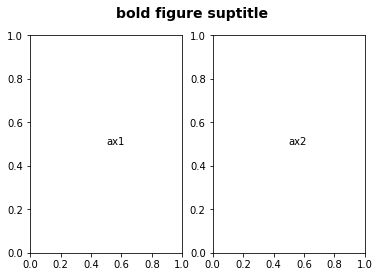

In [ ]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax1 = plt.subplot(121) ; ax1.text(.5,.5,'ax1') #1x2grid 1st graph                                                                  
ax2 = plt.subplot(122) ; ax2.text(.5,.5,'ax2') #1x2grid 2nd graph                                                                  
plt.show()

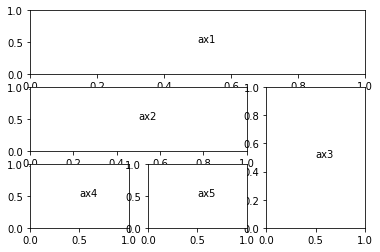

In [ ]:
#asymmetrical arrangements http://matplotlib.org/users/gridspec.html                                                               
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3); ax1.text(.5,.5,'ax1')
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2); ax2.text(.5,.5,'ax2')
ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2); ax3.text(.5,.5,'ax3')
ax4 = plt.subplot2grid((3,3), (2, 0)); ax4.text(.5,.5,'ax4')
ax5 = plt.subplot2grid((3,3), (2, 1)); ax5.text(.5,.5,'ax5')
plt.show()

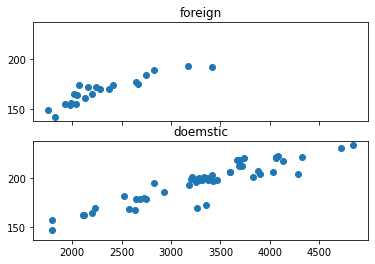

In [ ]:
## native matplotlib syntax for graphing                                                                                           

fig = plt.figure()
plt.subplots_adjust(hspace=0.2) #adjust horiz space between graphs                                                                 

ax1 = plt.subplot(211, title='foreign') #2x1grid 1st graph                                                                         
plt.scatter(auto[auto.foreign=='Foreign'].weight, auto[auto.foreign=='Foreign'].length)

ax2 = plt.subplot(212, sharex=ax1, sharey=ax1, title='doemstic') #2x1grid 2nd graph                                                
plt.scatter(auto[auto.foreign=='Domestic'].weight, auto[auto.foreign=='Domestic'].length)

xticklabels = ax1.get_xticklabels() #+ ax2.get_xticklabels() #drop labelling of 1st x axis                                         
plt.setp(xticklabels, visible=False)
plt.show()

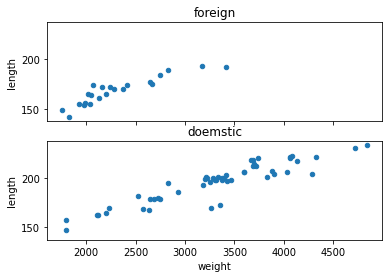

In [ ]:
## pandas syntax for graphing                                                                                                      

fig = plt.figure()
plt.subplots_adjust(hspace=0.2) #adjust horiz space between graphs                                                                 

ax1 = plt.subplot(211, title='foreign') #2x1grid 1st graph                                                                         
auto[auto.foreign=='Foreign'].plot(ax=ax1, kind='scatter', x='weight', y='length')

ax2 = plt.subplot(212, sharex=ax1, sharey=ax1, title='doemstic') #2x1grid 2nd graph                                                
auto[auto.foreign=='Domestic'].plot(ax=ax2,kind='scatter', x='weight', y='length')

xticklabels = ax1.get_xticklabels() #+ ax2.get_xticklabels() #drop labelling of 1st x axis                                         
plt.setp(xticklabels, visible=False)
plt.show()

Text(0.5, 0, 'weight')

Text(0.5, 0, 'length')

Text(0.5, 0, 'mpg')

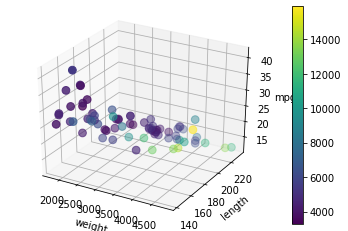

In [ ]:
####fancy!                                                                                                                         

###3d                                                                                                                              

from mpl_toolkits.mplot3d import Axes3D

#run this in regular console, not Ipython so that can pop up and zoom in!                                                          
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(auto.weight, auto.length, auto.mpg, s=60, c=auto.price)
ax.set_xlabel("weight")
ax.set_ylabel("length")
ax.set_zlabel("mpg")
fig.colorbar(p) #add colbar                                                                                                        
plt.show() #fancy but perhaps not very useful   

#### markers

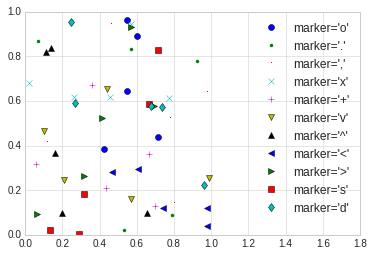

In [ ]:
#theres a bunch of different markers #https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

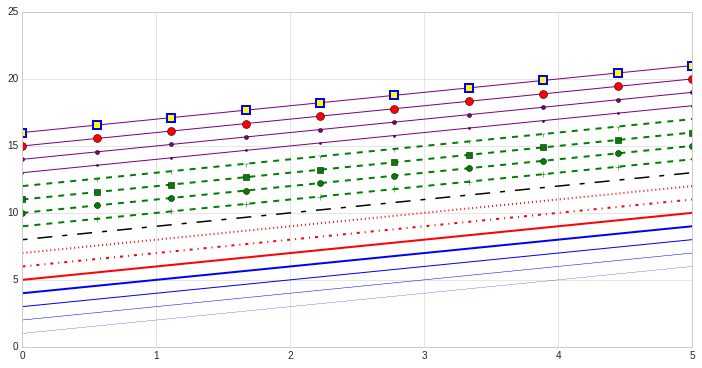

In [ ]:
x = np.linspace(0, 5, 10)
y = x ** 2

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

nice vis of 

errorbars:
https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html

contours
https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

(array([ 8., 10., 20., 13., 12.,  4.,  3.,  3.,  0.,  1.]),
 array([12. , 14.9, 17.8, 20.7, 23.6, 26.5, 29.4, 32.3, 35.2, 38.1, 41. ]),
 <a list of 10 Patch objects>)

(array([ 2.,  8., 15.,  7.,  7., 11., 15.,  6.,  2.,  1.]),
 array([31., 33., 35., 37., 39., 41., 43., 45., 47., 49., 51.]),
 <a list of 10 Patch objects>)

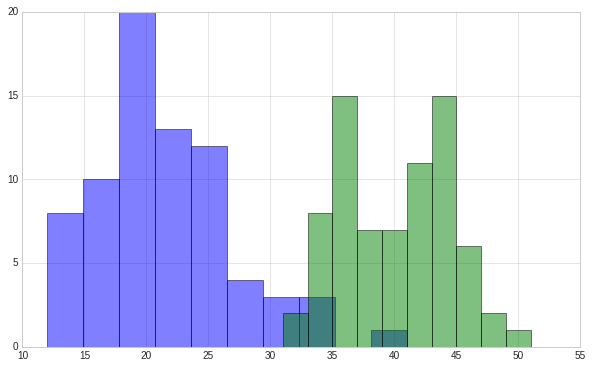

In [ ]:
#hist
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
plt.hist(auto.mpg,alpha=.5)
plt.hist(auto.turn,alpha=.5)
plt.show()
#plt.hist2d(auto.mpg, auto.turn, bins=30, cmap='Blues')
#cb = plt.colorbar()
#cb.set_label('counts in bin')

## d3

d3js.org

https://mpld3.github.io/

http://jakevdp.github.io/blog/2013/12/19/a-d3-viewer-for-matplotlib/

## plotly
https://nbviewer.org/gist/msund/7ac1203ded66fe8134cc

may also try mpld3 for making matplotlib interactive :)
https://colab.research.google.com/github/sachinmotwani20/Raw-Signal-Processing-Python/blob/master/ZoomGraphGoogleColab.ipynb#scrollTo=FsdH0px_ofdc

## maps

the whole course, geo dat sci:
https://darribas.org/gds_course/content/home.html

TODO:
do see basemap!
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

### foilum 
[TODO: expand, elaborate, polish]

In [ ]:
os.chdir('/content')
os.getcwd()

'/content'

In [ ]:
import folium as f

In [ ]:
f.Map(location=[45.5236, -122.6750]) #open street map is default                            
#m.save('m7.html')                   
#webbrowser.get('firefox').open_new_tab('m.html') #; webbrowser.open('m.html')                   


In [ ]:
geolocator = Nominatim()
location = geolocator.geocode("401 cooper st camden nj")
print(location.address)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


401, Cooper Street, Downtown, Camden, Camden County, New Jersey, 08102, United States


In [ ]:
print((location.latitude, location.longitude))

(39.94727470588235, -75.12232741176472)


In [ ]:
place = geolocator.geocode("camden nj") #first geocode location                                          
place

Location(Camden, Camden County, New Jersey, 08102, United States, (39.9448402, -75.1198911, 0.0))

In [ ]:
f.Map(location=place[1])

In [ ]:
f.Map(location=place[1], tiles='Stamen Toner', zoom_start=16)

In [ ]:
f.Map(location=place[1], tiles='Stamen Terrain', zoom_start=6)

In [ ]:
###adding markup by hand--easy! good for few u/a                                                
m = f.Map(location=geolocator.geocode("401 cooper st camden nj")[1], zoom_start=14)
m.add_child(f.Marker(geolocator.geocode("401 cooper st camden nj 08120")[1], popup='DPPA'))
m.add_child(f.Marker(geolocator.geocode("321 cooper st camden nj 08102" )[1], popup='bbb'))
#m.add_child(f.CircleMarker(geolocator.geocode("waterfront camden nj")[1], popup='waterfront'))          


In [ ]:
'''can pick color, icon                                                                         
icons: http://www.w3schools.com/icons/bootstrap_icons_glyphicons.asp                            
colors: http://www.w3schools.com/colors/colors_names.asp                                        
'''
m = f.Map(location=geolocator.geocode("401 cooper st camden nj")[1], zoom_start=14)
m.add_child(f.Marker(geolocator.geocode("401 cooper st camden nj")[1],
                     popup='i love this place!',icon = f.Icon(icon = 'cloud' ,color = 'green')))
m.add_child(f.CircleMarker(geolocator.geocode("2 Riverside Dr, Camden, NJ 08103")[1], popup='waterfront'\
,color='#8A2BE2',fill_color='#F0F8FF'))
m.save('m8.html')

'can pick color, icon                                                                         \nicons: http://www.w3schools.com/icons/bootstrap_icons_glyphicons.asp                            \ncolors: http://www.w3schools.com/colors/colors_names.asp                                        \n'

In [ ]:
### many points, clustering, USEFUL! fancy!                                                     

#http://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/                     

urllib.request.urlretrieve('https://raw.githubusercontent.com/devanshmanu/StravAdd/master/SFPD_Incidents_-_Current_Year__2015_.csv', "SFPD_Incidents_-_Current_Year__2015_.csv")

crimedata = pd.read_csv('SFPD_Incidents_-_Current_Year__2015_.csv')

len(crimedata)

#crimedata[1:3]


('SFPD_Incidents_-_Current_Year__2015_.csv',
 <http.client.HTTPMessage at 0x7f7b88614f90>)

112331

In [ ]:
#for speed purposes                                                                             
MAX_RECORDS = 1000

#create empty map zoomed in on San Francisco                                                    
m = f.Map(location=(37.76, -122.45), zoom_start=12)

loc = []
#add a marker for every record in the filtered data, use a clustered view                       
for each in crimedata[0:MAX_RECORDS].iterrows():
    loc.append([each[1]['Y'],each[1]['X']])


loc[1:3]


m.add_children(MarkerCluster(locations=loc))
m.save('m10.html')
#very cool! hover over it--pups u in blue a polygon that the aggregate refers to!               


[[37.7126165766239, -122.413676487435], [37.7126165766239, -122.413676487435]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  app.launch_new_instance()


In [ ]:
### heatmap http://www.jackboot7.com/visualizing-tweets.html                                    

m = f.Map(location=(37.76, -122.45), zoom_start=12)
m.add_children(HeatMap(loc))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  after removing the cwd from sys.path.


#### polygons


In [ ]:
#adding geojson
map = f.Map()
map

In [ ]:
f.GeoJson('https://raw.githubusercontent.com/datasets/geo-admin1-us/master/data/admin1-us.geojson').add_to(map)
map

In [ ]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 36.8 MB/s 
     |████████████████████████████████| 6.3 MB 38.8 MB/s 


In [ ]:
import geopandas as gpd
states = gpd.read_file(state_geo)
print(states.head())

   id        name                                           geometry
0  AL     Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...
1  AK      Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  AZ     Arizona  POLYGON ((-109.04250 37.00026, -109.04798 31.3...
3  AR    Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  CA  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...


In [ ]:
state_data.head(50)

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


In [ ]:
m = f.Map(location=[40, -95], zoom_start=4)
m

In [ ]:
f.Choropleth(
    geo_data=state_geo, #geo data obj: state_geo
    name="choropleth",
    data=state_data,   #regular data object
    columns=["State", "Unemployment"], # 1st var is join or merge var; 2nd is map var
    key_on="feature.id",  #this is merge/join var from geojson; just prefix ith 'feature
    fill_color="YlGnBu", #pick some color, opacities
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Unemployment Rate (%)",
).add_to(m)

f.LayerControl().add_to(m)

m
#m.save('m2.html')

## ols regression
TODO: just focus on vis of it!

In [ ]:
#example of age and fear from slides; not results little different 
#as i had sligtly different input numbers
import pandas as pd
import statsmodels.formula.api as sm
df = pd.DataFrame({"age": [23,38,48,57,72], "fear": [2,6,6,14,11]})
result = sm.ols(formula="fear ~ age", data=df).fit()
print(result.summary())

#LATER TODO nice sns vis https://seaborn.pydata.org/tutorial/regression.html
#nice overview for beginners https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                   fear   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     7.432
Date:                Thu, 14 Apr 2022   Prob (F-statistic):             0.0722
Time:                        23:22:48   Log-Likelihood:                -11.171
No. Observations:                   5   AIC:                             26.34
Df Residuals:                       3   BIC:                             25.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3872      3.958     -0.603      0.5

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [ ]:
# wages example: fist download the dataset from:
# https://sites.google.com/site/adamokuliczkozaryn/adv_reg/wages.csv
# then uplodad to the colab: 
# click folder on the right toolbar and upload the file to sampple_data
#df = pd.read_csv('sample_data/wages.csv') #read data
# or:
df = pd.read_csv('https://sites.google.com/site/adamokuliczkozaryn/adv_reg/wages.csv')
df.dtypes #have a look


Unnamed: 0      int64
wage          float64
educ            int64
exp             int64
union          object
nonwhite       object
hispanic       object
female         object
married        object
south          object
_est_logit      int64
dtype: object

In [ ]:
df.head(10) #print the first 10 obs

,Unnamed: 0,wage,educ,exp,union,nonwhite,hispanic,female,married,south,_est_logit
0,0,4.9998,12,4,no,no,no,male,no,yes,1
1,1,17.2500,18,5,no,no,no,male,yes,no,1
2,2,9.8601,15,13,no,no,no,male,yes,no,1
3,3,14.9990,12,39,yes,no,no,male,yes,no,1
4,4,4.0000,12,4,no,no,no,male,no,no,1
5,5,14.0010,11,13,yes,no,no,male,yes,no,1
6,6,16.4250,14,19,no,no,no,male,no,no,1
7,7,10.5000,12,4,yes,no,no,male,yes,no,1
8,8,20.5510,12,33,no,no,no,male,yes,no,1
9,9,6.5000,12,5,no,no,no,male,no,yes,1


In [ ]:
df[['wage','educ','exp']].describe()

,wage,educ,exp
count,534.000000,534.000000,534.000000
mean,9.023939,13.018727,17.822097
std,5.138876,2.615373,12.379710
min,1.000000,2.000000,0.000000
25%,5.249900,12.000000,8.000000
50%,7.778000,12.000000,15.000000
75%,11.250000,15.000000,26.000000
max,44.500000,18.000000,55.000000


In [ ]:
df.corr()

,age,fear
age,1.000000,0.844053
fear,0.844053,1.000000


In [ ]:
result = sm.ols(formula="wage ~ educ + exp + married", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     45.45
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           3.78e-26
Time:                        23:23:37   Log-Likelihood:                -1570.2
No. Observations:                 534   AIC:                             3148.
Df Residuals:                     530   BIC:                             3165.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.0704      1.225     -4.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


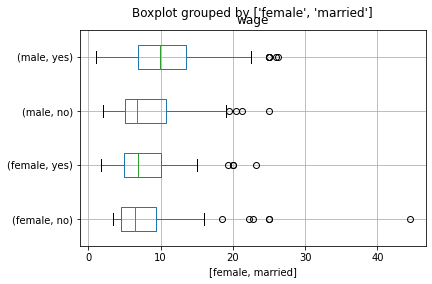

(<matplotlib.axes._subplots.AxesSubplot at 0x7feab187bd90>, None)

In [ ]:
df.boxplot(column='wage',by=['female','married'],vert=False), plt.show()

##notes to myself:

apr2022 need to reorganize and polish this; little messy

do more data mgmt like merge, recode, collapse, already in other py or notebooks!!!

### TODO for vis

per dendogram classification tree see scipy.py

### TODO for descriptive stats
add examples for crosstabs maybe from auto from pandasSimpleForResearchMethods.py or make sth up like quadratic happiness across urbanicity in china etc

and add more stats and graphs like  boxplots etc
https://datacarpentry.org/python-socialsci/13-matplotlib/index.html

In [ ]:
#example to load data
file="/content/Untitled spreadsheet - Sheet1.csv"
myData=pd.read_csv(file)
myData

,name,income
0,joe,20
1,becky,30
2,jack,10


##references                                                                                                  


### SAVING CSV ONLINE                                                                                                              
for your own dataset can just save as csv somewhere online and feed the link like this                                             
just upload to google drive and share it, and cp file id, eg:                                                                      
1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8                                                                                                  
and put into                                                                                                                       
https://drive.google.com/uc?id=FILE-ID-GOES-HERE&export=download                                                                   
                                                                                                                                   
eg:                                                                                                                               
url="https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download"                                             
dat=pd.read_csv(url)                                                                                                               
 ### NOTEBOOKS                                                                                                                      
a ton of free online shells or notebooks eg:                                                                                       
                                                                                                                                   
super simple shell:                                                                                                                
https://www.python.org/shell/                                                                                                      
                                                                                                                                   
notebook:                                                                                                                          
https://cocalc.com/projects/2ad3cb5d-fc12-479b-993c-e62c1e68071a/files/Welcome%20to%20CoCalc.ipynb?session=default                 
                                                                                                                                   
and notably google's colab (need to have goog acct):                                                                               
https://colab.research.google.com/drive/1mJo0sJYI58rG63-IEjUOEFE_txQI9q3T                                                          
                                                                                                                                   
this would load your code from url, say github                                                                                     
https://notebooks.gesis.org/binder/ 


### bar charts
https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
